# 과제(1), 빈칸 채우기

출처 : https://github.com/teddylee777/machine-learning/blob/master/07-Scikit-Learn/tutorial/09-%EC%95%99%EC%83%81%EB%B8%94-(Ensemble)-(%EC%8B%A4%EC%8A%B5).ipynb

**참고자료 (블로그)**

* [보팅(Voting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)
* [배깅(Bagging)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)
* [부스팅(Boosting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)

### 모델별 성능평가를 위한 함수

- 시작하기에 앞서, 과제로 사용한 자료 원본 제작자인 Teddynote 님의 커스텀 모듈을 다운받아보겠습니다.

In [2]:
# 모듈 설치
!pip install teddynote -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 37.1 MB/s eta 0:00:00


In [3]:
from teddynote import utils

# 그래프 사이즈 설정
utils.set_plot_options(figsize=(12, 10))

# MSE 에러 설정
utils.set_plot_error('mse')

### 필요한 데이터셋 로드

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True, precision=3)

In [5]:
# 사용할 데이터셋입니다.
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X, y = housing.data, housing.target

In [6]:
X = pd.DataFrame(X, columns=housing.feature_names)
y = pd.DataFrame(y, columns=['target'])

X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

**컬럼 소개**

속성 수 : 8

* **MedInc** : 해당 지역의 중위 가구 소득 (단위: 10,000달러) / 예: 3.5 → $35,000
* **HouseAge** : 해당 지역의 주택 평균 연식
* **AveRooms** : 세대당 평균 방 개수
* **AveBedrms** : 세대당 평균 침실 개수
* **Population** : 해당 지역의 총 인구 수
* **AveOccup** : 세대당 평균 거주 인원 수
* **Latitude** : 위도 (지리적 위치)
* **Longitude** : 경도 (지리적 위치)   
   
목표 변수
* **target** : 해당 지역의 중위 주택 가격 (단위: 100,000달러) / 예: 2.5 → $250,000

### 간단한 전처리

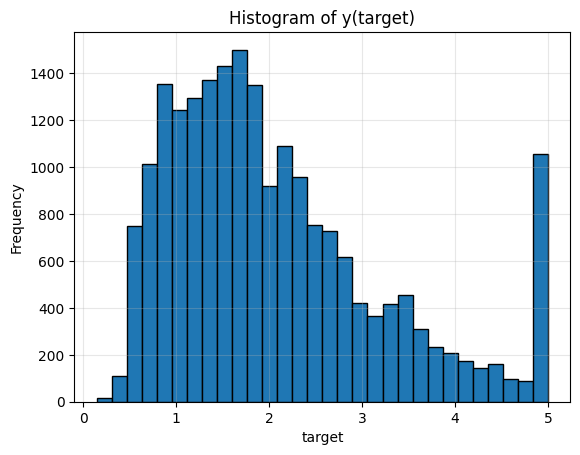

In [7]:
# 타겟변수(y)의 분포

plt.hist(y, bins=30, edgecolor='black')
plt.title("Histogram of y(target)")
plt.xlabel("target")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
# 해당 데이터셋의 타겟변수(중위 주택 가격) 최댓값이 한정되어 있습니다.
print(f"최댓값: {np.max(y)}, 개수: {y[y['target'] == np.max(y)].count()}")

최댓값: 5.00001, 개수: target    965
dtype: int64


In [9]:
# 5를 초과할 경우 모두 동일한 값으로 일괄처리 되었다고 가정하고, 본 과제에서는 이 값들을 제외하겠습니다.

X = X[y['target'] <= 5].reset_index(drop=True)
y = y[y['target'] <= 5].reset_index(drop=True)

**데이터 분할**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# test size = 0.2, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# shape 확인
print(X_train.shape, X_test.shape)

(15740, 8) (3935, 8)


## 단일 회귀 모델

In [13]:
# 선형회귀
from sklearn.linear_model import LinearRegression
# 릿지 (L2 규제)
from sklearn.linear_model import Ridge
# 라쏘 (L1 규제)
from sklearn.linear_model import Lasso
# 엘라스틱넷
from sklearn.linear_model import ElasticNet
# 스케일러
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# 파이프라인
from sklearn.pipeline import make_pipeline
# 다항회귀
from sklearn.preprocessing import PolynomialFeatures
# 성능평가지표
from sklearn.metrics import r2_score, mean_squared_error

### LinearRegression

In [14]:
# 모델 정의
lr = LinearRegression()

# 모델 학습
lr.fit(X_train, y_train)

# 예측
lr_pred = lr.predict(X_test)

# 성능 평가
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

print(f'R2 : {round(lr_r2, 4)}, MSE : {round(lr_mse, 4)}')

R2 : 0.5749, MSE : 0.4239


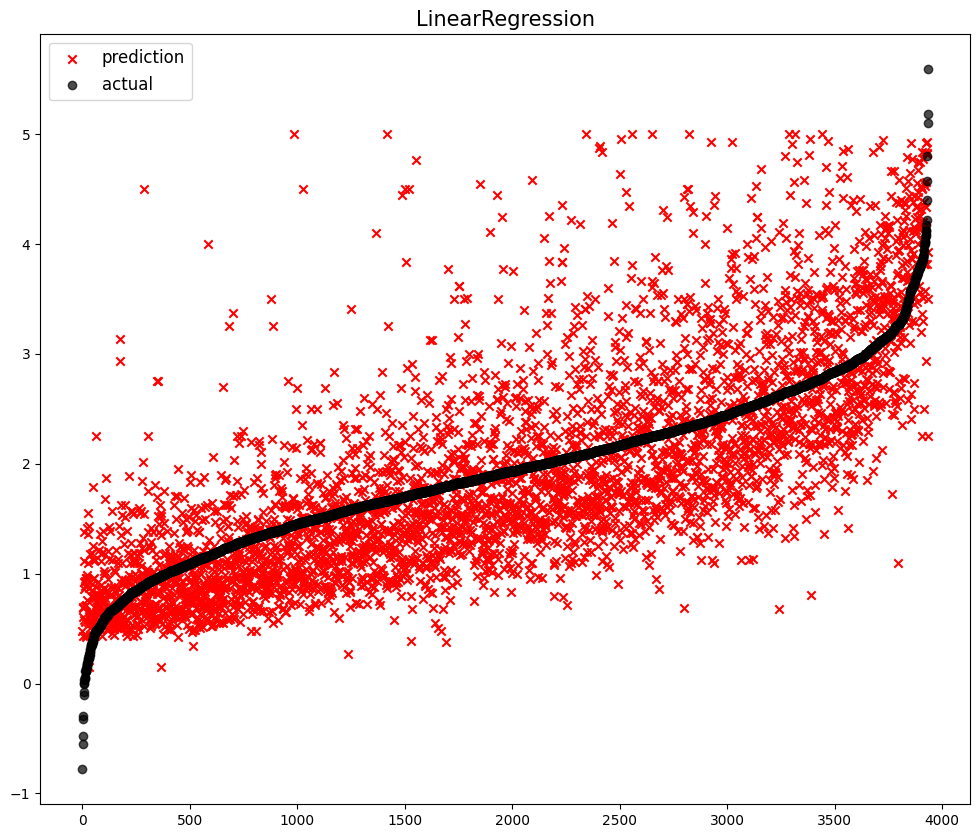

model     error
0  LinearRegression  0.423897

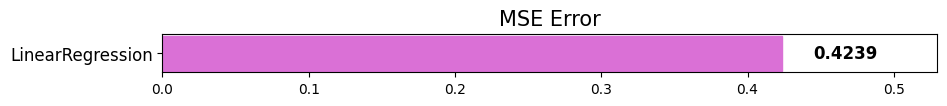

In [15]:
# 이 코드를 돌리면 예측 결과 시각화 및 각 모델의 성능이 계속 업데이트가 됩니다.
utils.plot_error('LinearRegression', lr_pred, y_test)

### Ridge

In [16]:
# 모델 정의 (규제 계수인 alpha는 0.1로 적용합니다.)
ridge = Ridge(alpha=0.1)

# 모델 학습
ridge.fit(X_train, y_train)

# 예측
ridge_pred = ridge.predict(X_test)

# 성능 평가
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print(f'R2 : {round(ridge_r2, 4)}, MSE : {round(ridge_mse, 4)}')

R2 : 0.5749, MSE : 0.4239


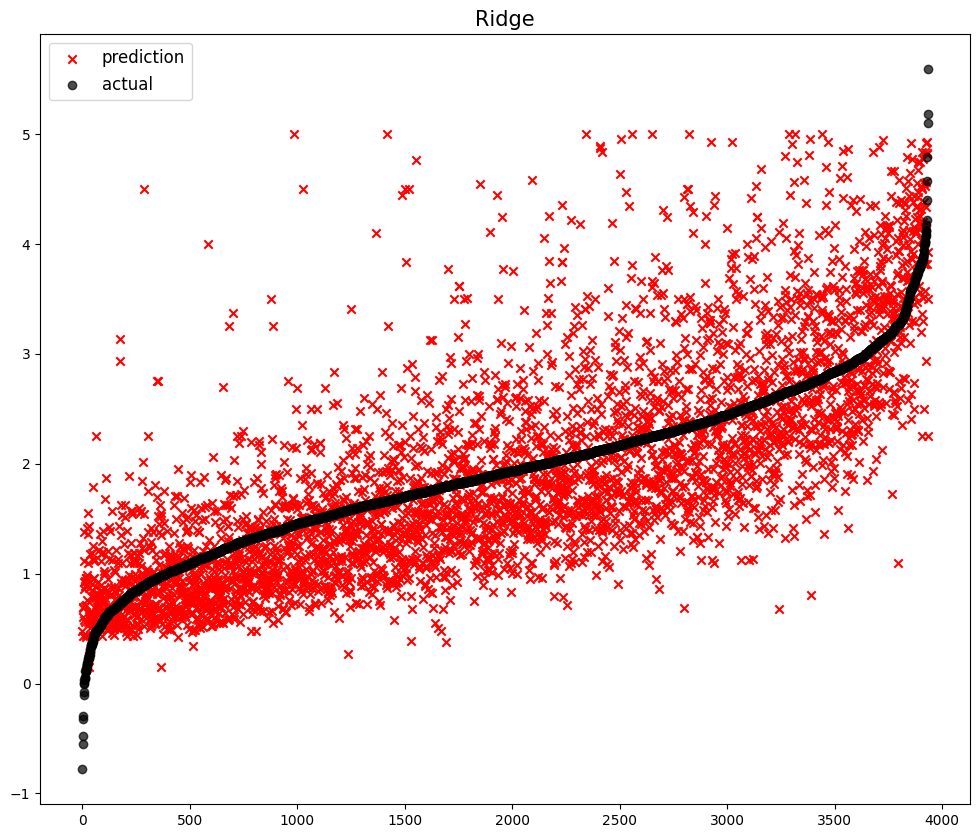

model     error
0             Ridge  0.423898
1  LinearRegression  0.423897

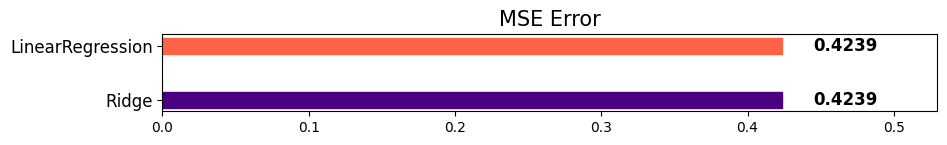

In [17]:
utils.plot_error('Ridge', ridge_pred, y_test)

### Lasso

In [18]:
# 모델 정의 (규제 계수인 alpha는 0.01로 적용합니다.)
lasso = Lasso(alpha=0.01)

# 모델 학습
lasso.fit(X_train, y_train)

# 예측
lasso_pred = lasso.predict(X_test)

# 성능 평가
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f'R2 : {round(lasso_r2, 4)}, MSE : {round(lasso_mse, 4)}')

R2 : 0.5645, MSE : 0.4342


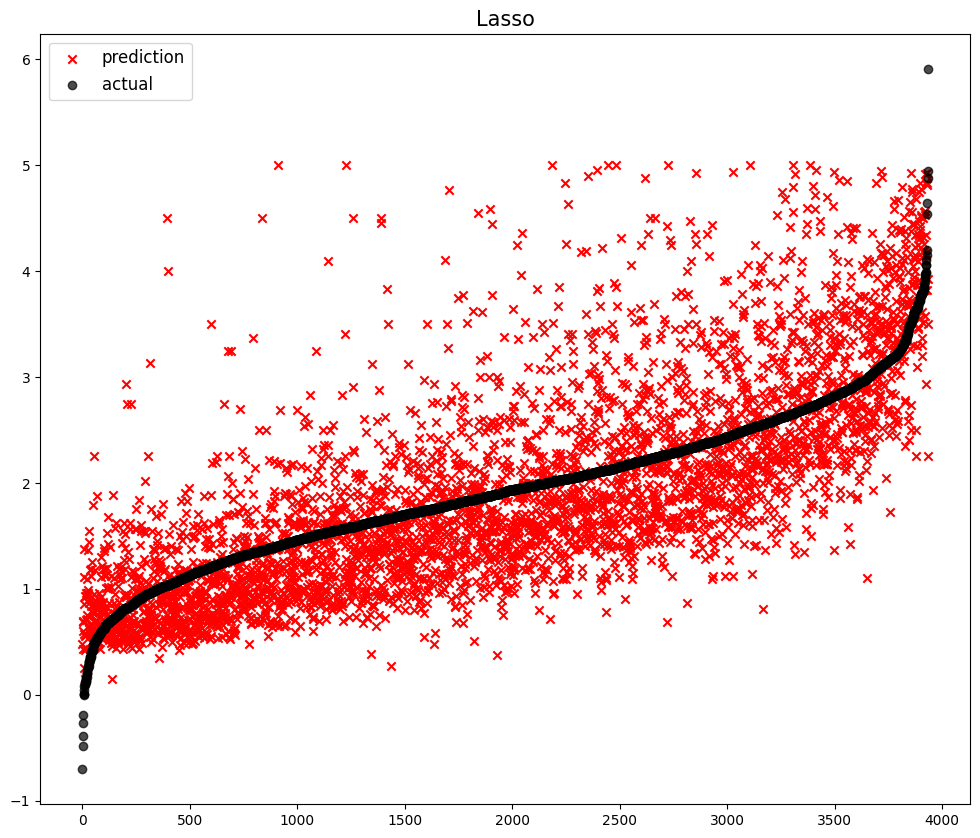

model     error
0             Lasso  0.434209
1             Ridge  0.423898
2  LinearRegression  0.423897

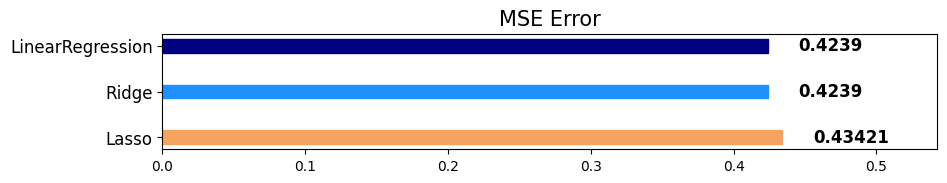

In [19]:
utils.plot_error('Lasso', lasso_pred, y_test)

### ElasticNet

In [20]:
# 모델 정의 (규제 계수 `alpha=0.001`, `l1_ratio=0.8` 로 적용합니다.)
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.8)

# 모델 학습
elasticnet.fit(X_train, y_train)

# 예측
elasticnet_pred = elasticnet.predict(X_test)

# 성능 평가
elasticnet_r2 = r2_score(y_test, elasticnet_pred)
elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)

print(f'R2 : {round(elasticnet_r2, 4)}, MSE : {round(elasticnet_mse, 4)}')

R2 : 0.5744, MSE : 0.4244


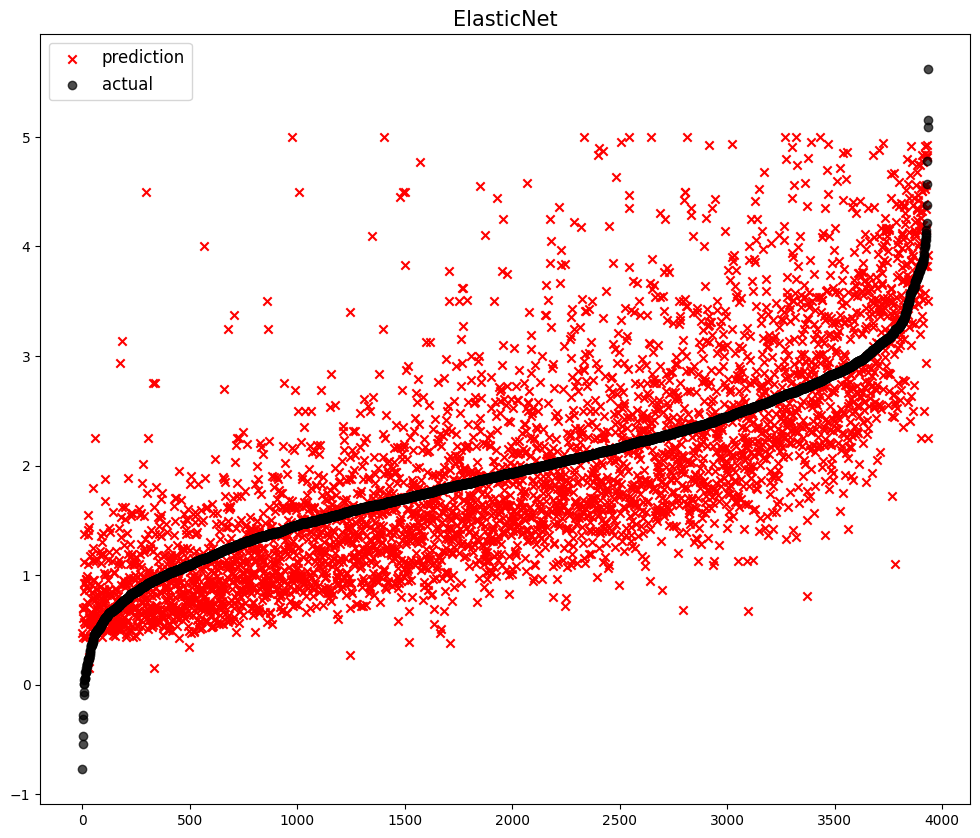

model     error
0             Lasso  0.434209
1        ElasticNet  0.424410
2             Ridge  0.423898
3  LinearRegression  0.423897

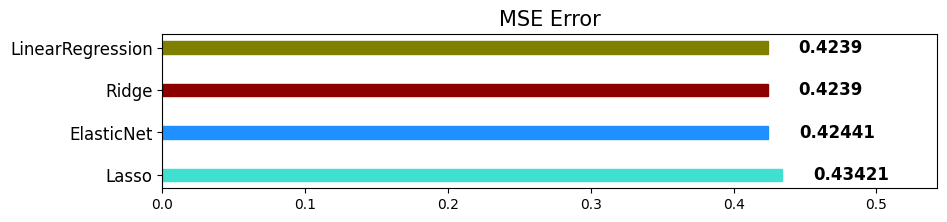

In [21]:
utils.plot_error('ElasticNet', elasticnet_pred, y_test)

### Pipeline 학습

**파이프라인(Pipeline)** 은 머신러닝에서 여러 단계를 하나의 흐름으로 묶어주는 도구입니다.   
지금까지는 스케일링과 모델학습을 따로 진행했다면, 이를 파이프라인으로 묶어 한번에 처리할 수 있습니다.   
데이터 누수 방지, 코드 간결화 등의 이유로 실무에서도 자주 사용하는 방식이라고 합니다!   

본 과제에서는 **파이프라인 학습**을 통해 StandardScaler와 ElasticNet을 동시에 적용해 보겠습니다.

In [22]:
# 파이프라인 정의 (규제 계수 `alpha=0.001`, `l1_ratio=0.8`을 적용합니다.)
standard_elasticnet = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.001, l1_ratio=0.8)
)

# 파이프라인 학습
standard_elasticnet.fit(X_train, y_train)

# 예측
standard_elasticnet_pred = standard_elasticnet.predict(X_test)

# 성능 평가
standard_elasticnet_r2 = r2_score(y_test, standard_elasticnet_pred)
standard_elasticnet_mse = mean_squared_error(y_test, standard_elasticnet_pred)

print(f'R2 : {round(standard_elasticnet_r2, 4)}, MSE : {round(standard_elasticnet_mse, 4)}')

R2 : 0.5744, MSE : 0.4244


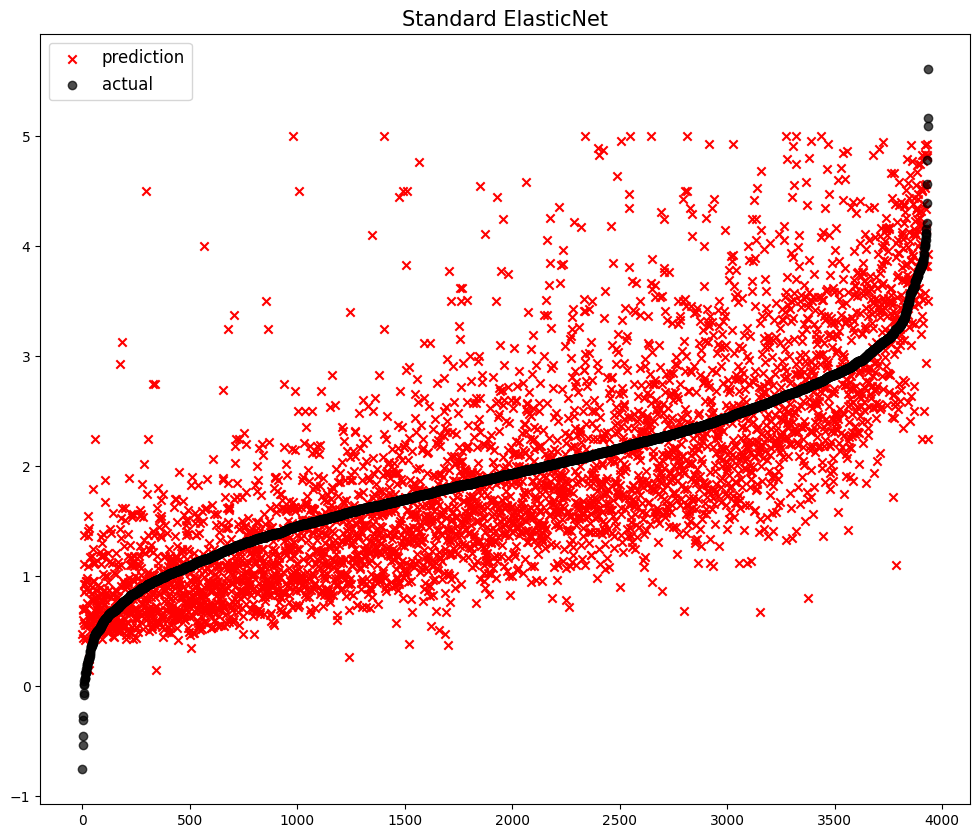

model     error
0                Lasso  0.434209
1           ElasticNet  0.424410
2  Standard ElasticNet  0.424381
3                Ridge  0.423898
4     LinearRegression  0.423897

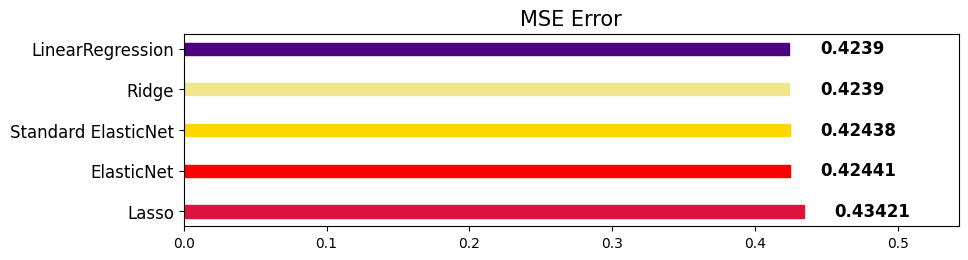

In [23]:
utils.plot_error('Standard ElasticNet', standard_elasticnet_pred, y_test)

### PolynomialFeatures

PolynomialFeatures는 다항식 회귀모델을 위해 기존 변수들을 다항식으로 만들때 사용했습니다. 기억나시나요?   
이번에는 PolynomialFeatures와 Standard 스케일링을 진행한 ElasticNet의 파이프라인 학습을 진행해보겠습니다.

In [24]:
# 파이프라인 정의
# (PolynomialFeatures는 `degree=2`, `include_bias=False`를 적용합니다.)
# (ElasticNet 모델은 규제 계수 `alpha=0.001`, `l1_ratio=0.8 을 적용합니다.)
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.001, l1_ratio=0.8)
)

# 모델 학습
poly_pipeline.fit(X_train, y_train)

# 예측
poly_pipeline_pred = poly_pipeline.predict(X_test)

# 성능 평가
poly_pipeline_r2 = r2_score(y_test, poly_pipeline_pred)
poly_pipeline_mse = mean_squared_error(y_test, poly_pipeline_pred)

print(f'R2 : {round(poly_pipeline_r2, 4)}, MSE : {round(poly_pipeline_mse, 4)}')

R2 : 0.6074, MSE : 0.3915


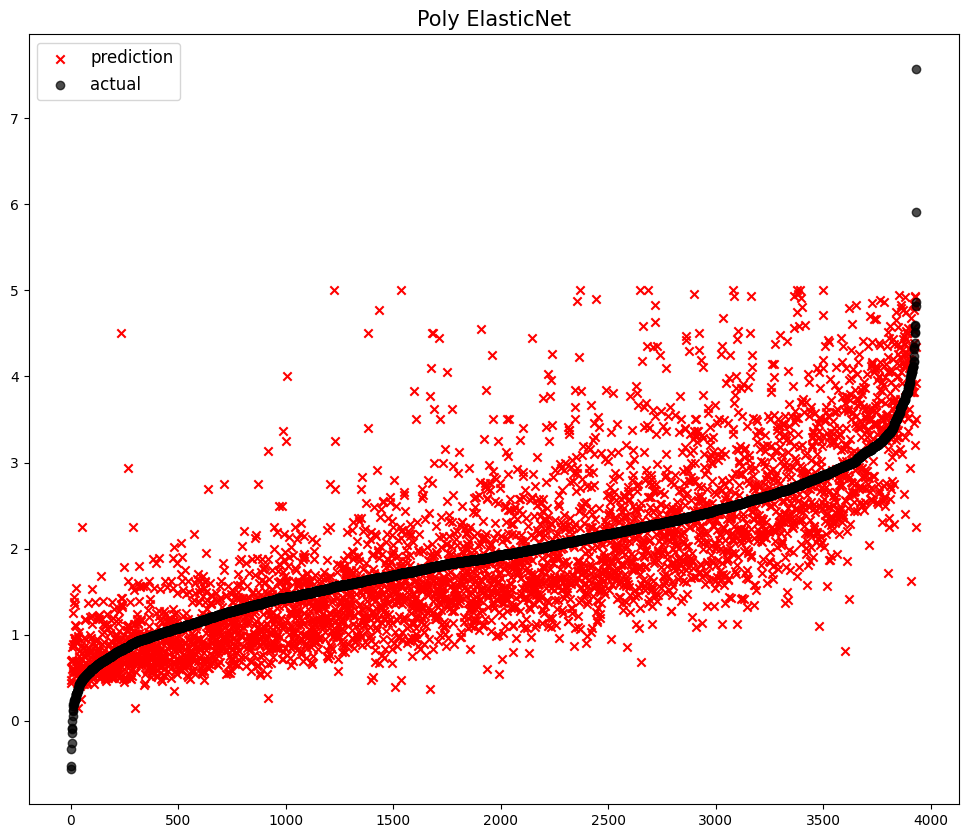

model     error
0                Lasso  0.434209
1           ElasticNet  0.424410
2  Standard ElasticNet  0.424381
3                Ridge  0.423898
4     LinearRegression  0.423897
5      Poly ElasticNet  0.391494

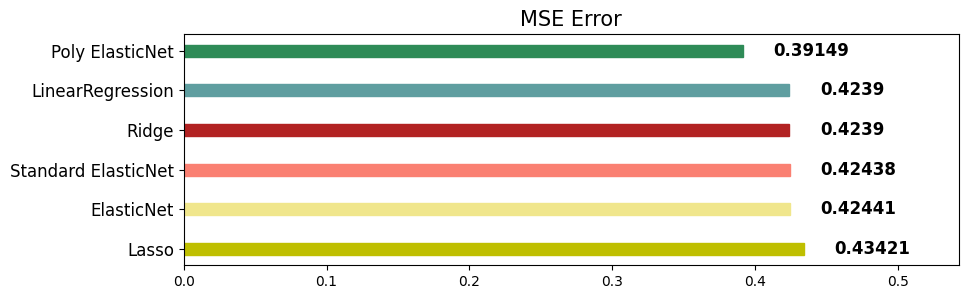

In [25]:
utils.plot_error('Poly ElasticNet', poly_pipeline_pred, y_test)

## 앙상블 모델

### 보팅 (Voting) - 회귀 (Regression)

Voting은 단어 뜻 그대로 **투표를 통해 결정하는 방식**입니다. Voting은 Bagging과 투표방식이라는 점에서 유사하지만, 다음과 같은 큰 차이점이 있습니다.

- Voting은 다른 알고리즘 model을 조합해서 사용합니다.
- Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용합니다.

In [26]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

반드시, **Tuple 형태로 모델**을 정의해야 합니다.

In [27]:
single_models = [
    ('lr', lr),
    ('ridge', ridge),
    ('lasso', lasso),
    ('standard_elasticnet', standard_elasticnet),
    ('poly_pipeline', poly_pipeline)
]

In [28]:
voting_regressor = VotingRegressor(single_models)

In [29]:
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('ridge', Ridge(alpha=0.1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('standard_elasticnet',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.001,
                                                         l1_ratio=0.8))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.001,
                                                         l1_ratio=0.8))]))])

In [30]:
voting_pred = voting_regressor.predict(X_test)

In [31]:
# 성능 평가
voting_r2 = r2_score(y_test, voting_pred)
voting_mse = mean_squared_error(y_test, voting_pred)

print(f'R2 : {round(voting_r2, 4)}, MSE : {round(voting_mse, 4)}')

R2 : 0.5835, MSE : 0.4153


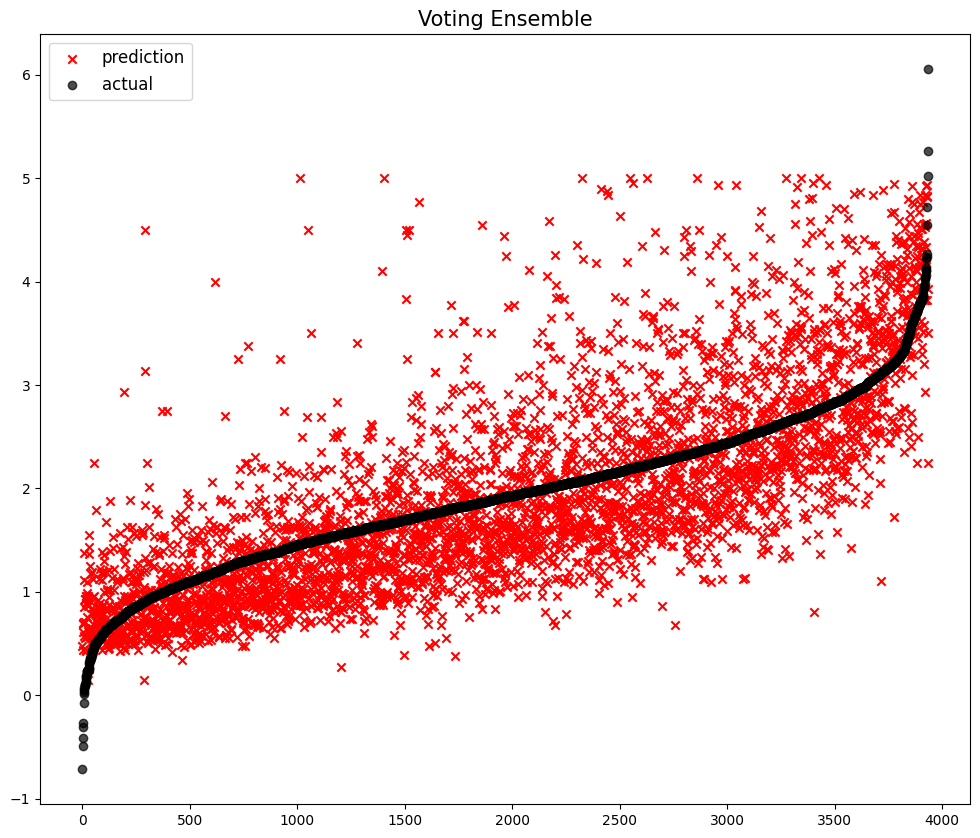

model     error
0                Lasso  0.434209
1           ElasticNet  0.424410
2  Standard ElasticNet  0.424381
3                Ridge  0.423898
4     LinearRegression  0.423897
5      Voting Ensemble  0.415333
6      Poly ElasticNet  0.391494

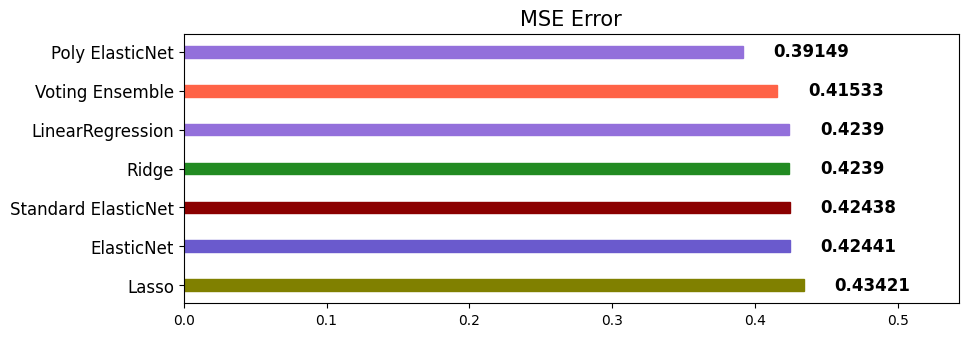

In [32]:
utils.plot_error('Voting Ensemble', voting_pred, y_test)

## 보팅 (Voting) - 분류 (Classification)

[자세한 내용 보기](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)

분류기 모델을 만들때, Voting 앙상블은 1가지의 **중요한 parameter**가 있습니다.   
`voting` = {'hard', 'soft'}

#### **hard** voting

class를 0, 1로 분류 예측을 하는 이진 분류를 예로 들어 보겠습니다.   
   
Hard Voting 방식에서는 결과 값에 대한 다수 class를 차용합니다.   
분류를 예측한 값이 1, 0, 0, 1, 1 이었다고 가정한다면, 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식에서는 1이 최종 값으로 예측을 하게 됩니다.

#### **soft** voting

Soft Voting 방식은 각각의 확률의 평균 값을 계산한 다음에 가장 확률이 높은 값으로 확정짓게 됩니다.

가령 class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6) 이었다면,

- class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4) / 5 = 0.44,
- class 1이 나올 최종 확률은 (0.6+0.1+0.1+0.6+0.6) / 5 = 0.4

가 되기 때문에 앞선 Hard Voting과는 다른 결과가 최종 산출됩니다.   

#### 참고) **회귀**에서의 보팅

회귀에서 Voting과 Soft Voting이 헷갈릴 수 있는데, 두 방식은 서로 다른 개념입니다.   
- Soft Voting은 각 모델이 특정 클래스라고 예측한 확률의 평균을 구함
- 회귀에서의 Voting은 모든 회귀기의 예측값을 단순 평균하에 최종 예측을 함
   
그래서 사실 Hard / Soft Voting이라는 용어도 분류에서만 쓰이는 개념인 것이죠!

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [34]:
models = [
    ('Logi', LogisticRegression()),
    ('ridge', RidgeClassifier())
]

In [35]:
# voting 옵션에 대하여 지정합니다.
vc = VotingClassifier(models, voting='soft')

## 배깅(Bagging)

Bootstrap + Aggregating   
1. 부트스트랩을 통해 전체 데이터셋에서 중복을 허용하여 무작위로 재표본 추출을 하고,
2. 동일한 알고리즘 모델을 사용해 각각의 샘플을 독립적으로 학습하고,
3. 모든 모델의 예측값을 결합해 최종 결과를 도출하는 방법입니다.

[자세한 내용 보기](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)

**Voting VS Bagging**

* **Voting**이 여러 알고리즘의 조합에 대한 앙상블이라면...
* **Bagging**은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블한다는 차이가 있습니다.

### RandomForest

- DecisionTree기반 Bagging 앙상블 모델입니다.
- 사용이 쉽고, 성능도 우수해서 매우 인기가 많습니다.

In [36]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [37]:
# 모델 정의 (random_state = 42)
rfr = RandomForestRegressor(random_state=42)

# 모델 학습
rfr.fit(X_train, y_train)

# 예측
rfr_pred = rfr.predict(X_test)

# 성능 평가
rfr_r2 = r2_score(y_test, rfr_pred)
rfr_mse = mean_squared_error(y_test, rfr_pred)

print(f'R2 : {round(rfr_r2, 4)}, MSE : {round(rfr_mse, 4)}')

R2 : 0.776, MSE : 0.2234


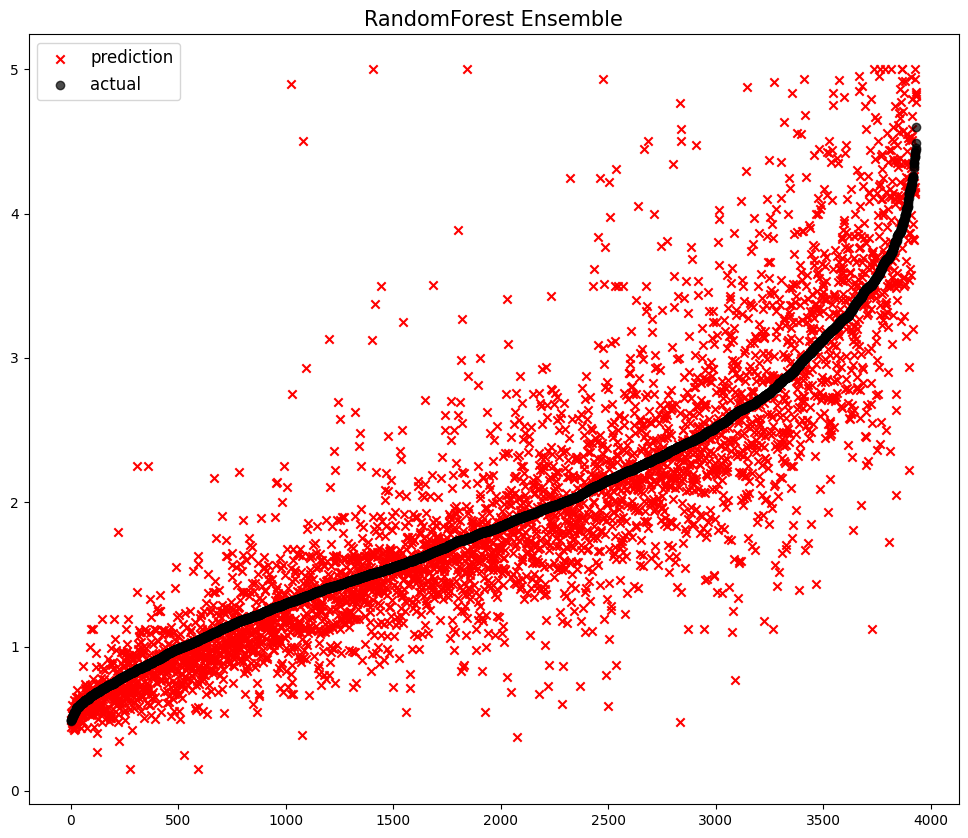

model     error
0                  Lasso  0.434209
1             ElasticNet  0.424410
2    Standard ElasticNet  0.424381
3                  Ridge  0.423898
4       LinearRegression  0.423897
5        Voting Ensemble  0.415333
6        Poly ElasticNet  0.391494
7  RandomForest Ensemble  0.223379

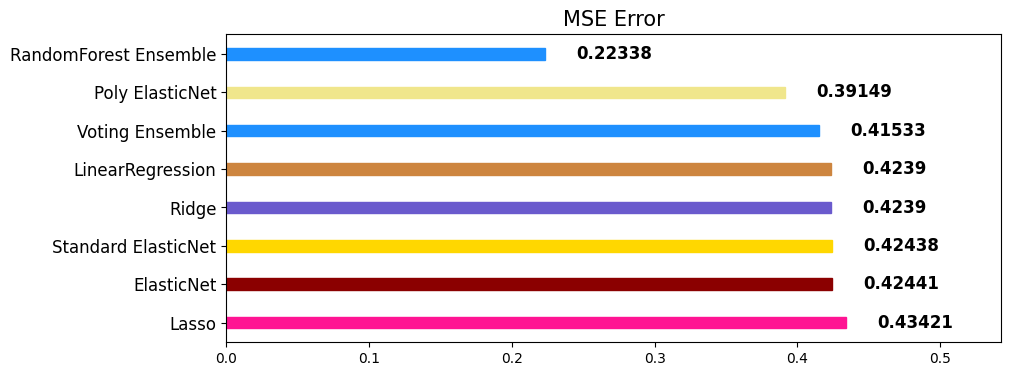

In [38]:
utils.plot_error('RandomForest Ensemble', rfr_pred, y_test)

**주요 Hyperparameter**

- `random_state`: 랜덤 시드 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 개수
- `max_depth`: 깊어질 수 있는 최대 깊이. 과대적합 방지용
- `n_estimators`: 앙상블하는 트리의 개수
- `max_features`: 최대로 사용할 feature의 개수. 과대적합 방지용
- `min_samples_split`: 트리가 분할할 때 최소 샘플의 개수. default=2. 과대적합 방지용

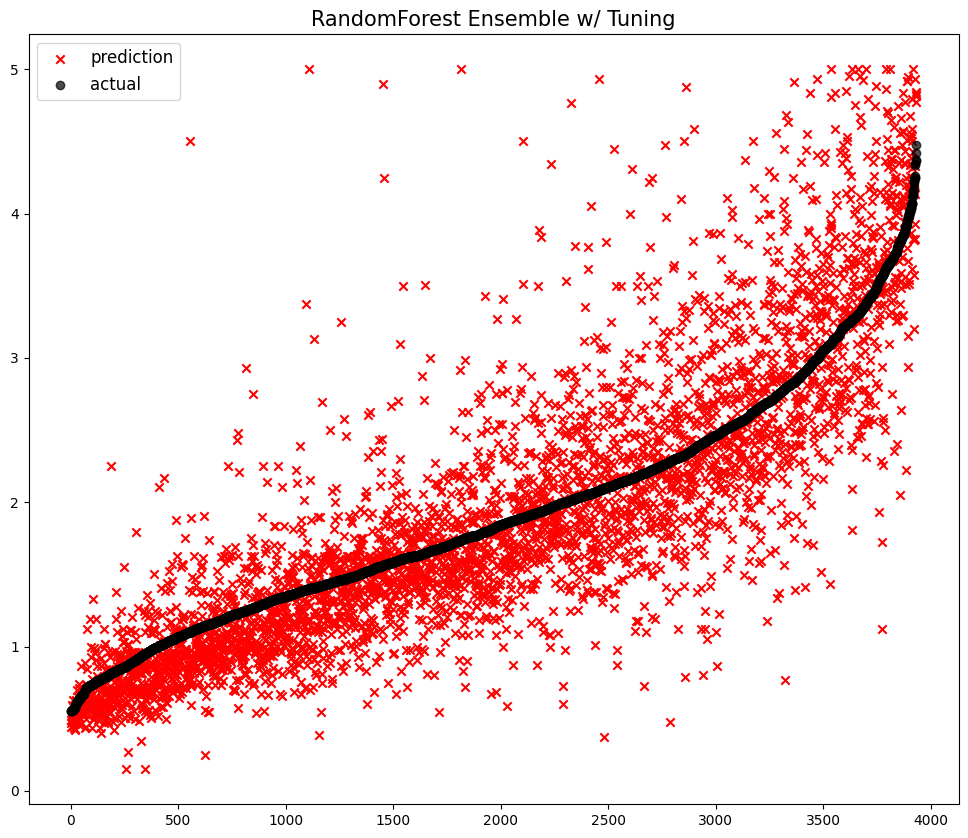

model     error
0                            Lasso  0.434209
1                       ElasticNet  0.424410
2              Standard ElasticNet  0.424381
3                            Ridge  0.423898
4                 LinearRegression  0.423897
5                  Voting Ensemble  0.415333
6                  Poly ElasticNet  0.391494
7  RandomForest Ensemble w/ Tuning  0.266462
8            RandomForest Ensemble  0.223379

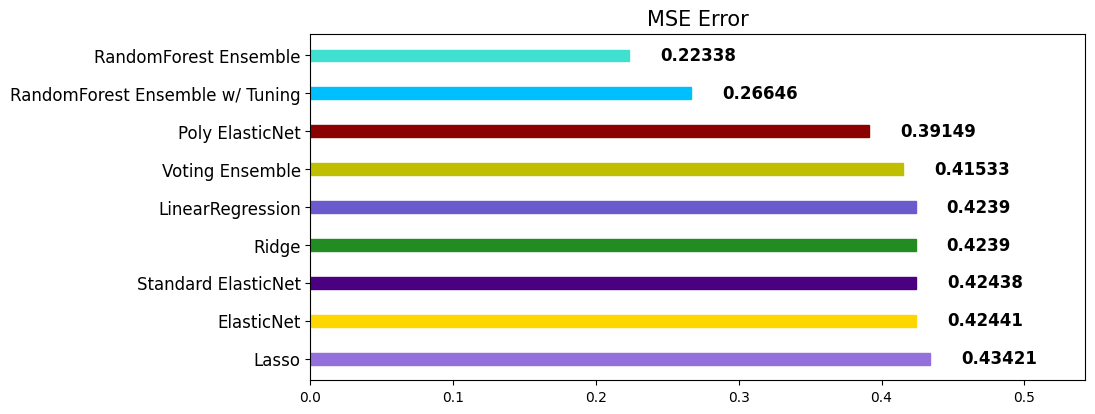

In [39]:
# 위 하이퍼파라미터를 직접 지정할 수도 있습니다.
# 물론 최적의 파라미터를 찾기 위해서는 튜닝 과정을 거쳐야 합니다. (밑에서 잠깐 나옵니다.)

# 주의) 튜닝을 할 땐 반드시 random_state 값을 고정시켜야 합니다!

rfr = RandomForestRegressor(random_state=42, n_estimators=1500, max_depth=9, max_features=0.9)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
utils.plot_error('RandomForest Ensemble w/ Tuning', rfr_pred, y_test)

## 부스팅 (Boosting)

[자세한 내용 보기]('https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3')

약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 **가중치를 부여해 오차를 보완**해 나가는 방식입니다.

**장점**
- 성능이 매우 우수합니다. (Lgbm, XGBoost 등)

**단점**
- 부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 **잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감**할 수 있습니다.
- 순차적이기 때문에 병렬처리에 어려움이 있고, 그렇다보니 **학습 시간이 오래걸립니다.**.

### GradientBoost

In [40]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [41]:
# 모델 정의 (random_state = 42)
gbr = GradientBoostingRegressor(random_state=42)

# 모델 학습
gbr_model = gbr.fit(X_train, y_train)

# 예측
gbr_pred = gbr_model.predict(X_test)

# 성능 평가
gbr_r2 = r2_score(y_test, gbr_pred)
gbr_mse = mean_squared_error(y_test, gbr_pred)

print(f'R2 : {round(gbr_r2, 4)}, MSE : {round(gbr_mse, 4)}')

R2 : 0.7507, MSE : 0.2486


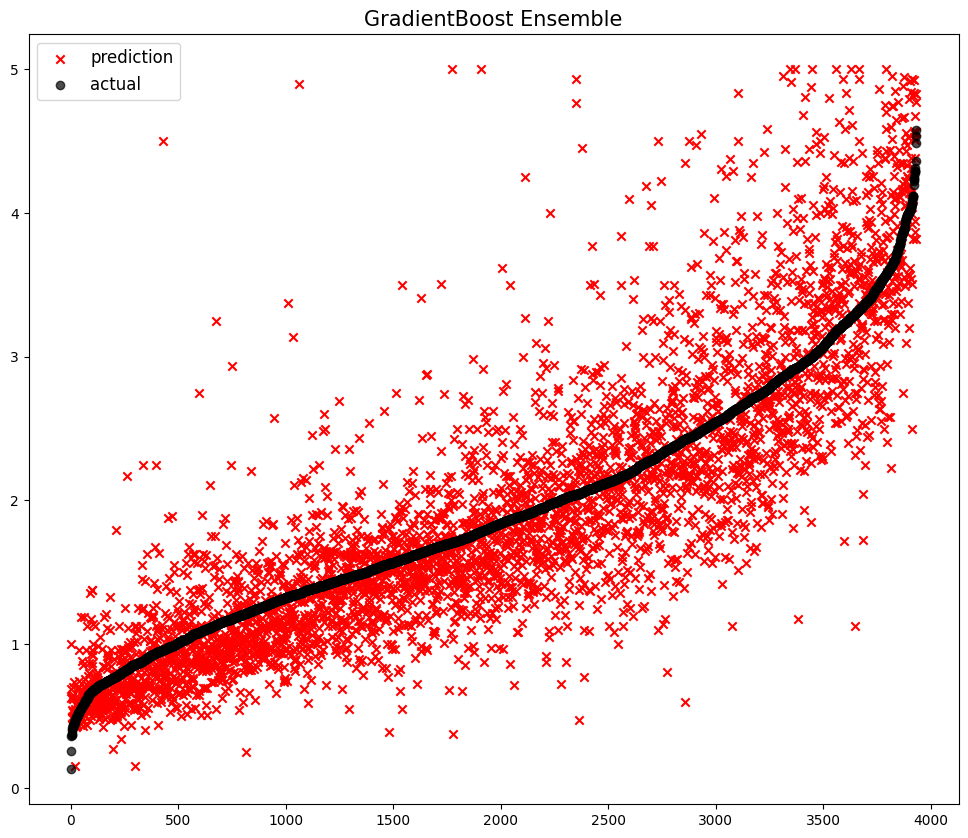

model     error
0                            Lasso  0.434209
1                       ElasticNet  0.424410
2              Standard ElasticNet  0.424381
3                            Ridge  0.423898
4                 LinearRegression  0.423897
5                  Voting Ensemble  0.415333
6                  Poly ElasticNet  0.391494
7  RandomForest Ensemble w/ Tuning  0.266462
8           GradientBoost Ensemble  0.248581
9            RandomForest Ensemble  0.223379

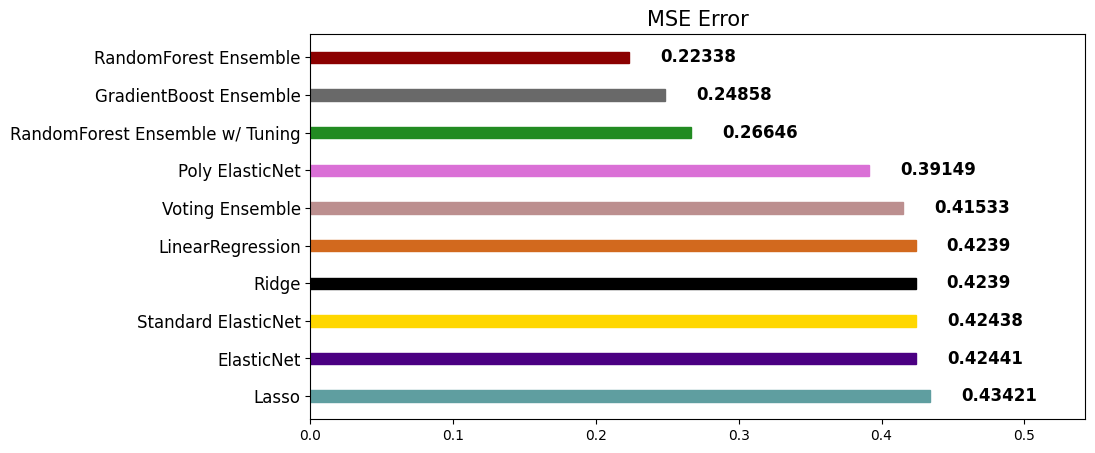

In [42]:
utils.plot_error('GradientBoost Ensemble', gbr_pred, y_test)

**주요 Hyperparameter**
- `random_state`: 랜덤 시드 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 개수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 개수 설정과 비슷한 개념). default=100
- `subsample`: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용
- `min_samples_split`: 노드 분할시 최소 샘플의 개수. default=2. 과대적합 방지용

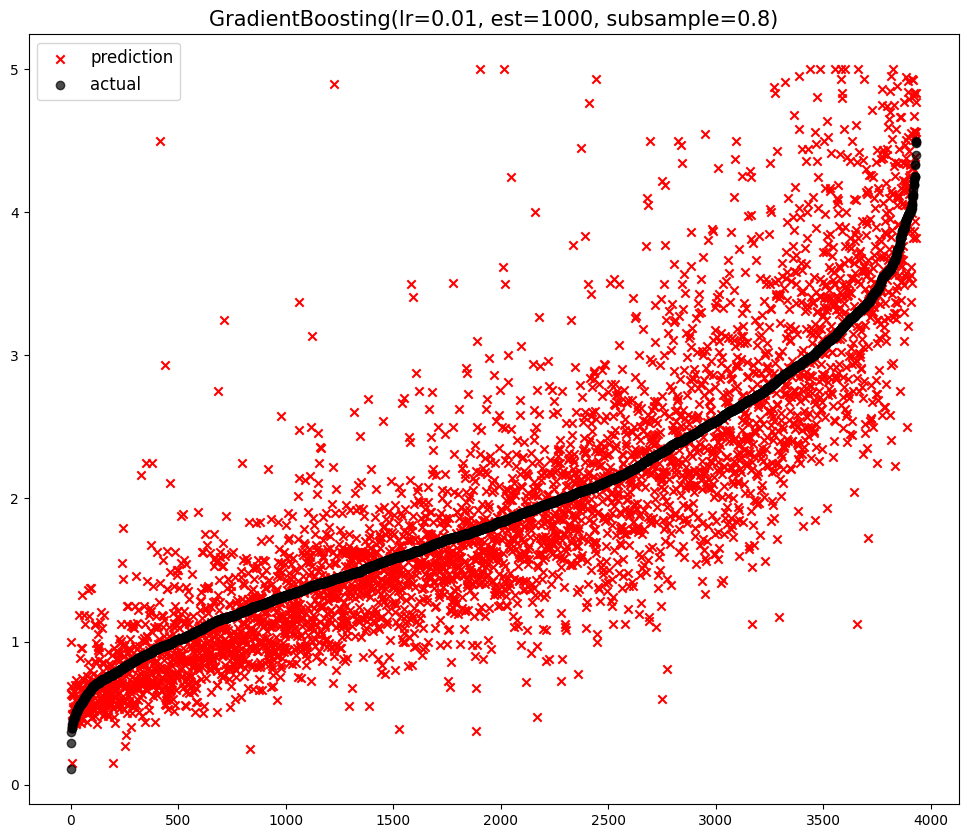

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223379

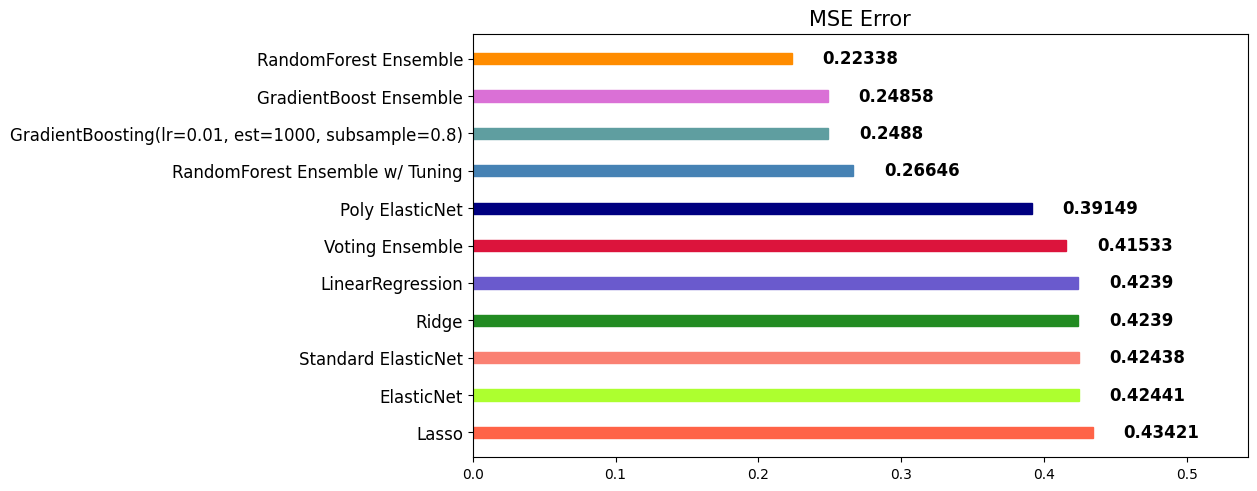

In [43]:
# 하이퍼파라미터 튜닝 수작업 Ver.
# 원하는 값들을 입력하면서 결과를 비교해보세요
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
utils.plot_error('GradientBoosting(lr=0.01, est=1000, subsample=0.8)', gbr_pred, y_test)

### XGBoost
e**X**treme **G**radient **B**oosting

In [44]:
from xgboost import XGBRegressor, XGBClassifier

In [45]:
# 모델 정의 (random_state = 42)
xgb = XGBRegressor(random_state = 42)

# 모델 학습
xgb_model = xgb.fit(X_train, y_train)

# 예측
xgb_pred = xgb_model.predict(X_test)

# 성능 평가
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

print(f'R2 : {round(xgb_r2, 4)}, MSE : {round(xgb_mse, 4)}')

R2 : 0.8075, MSE : 0.192


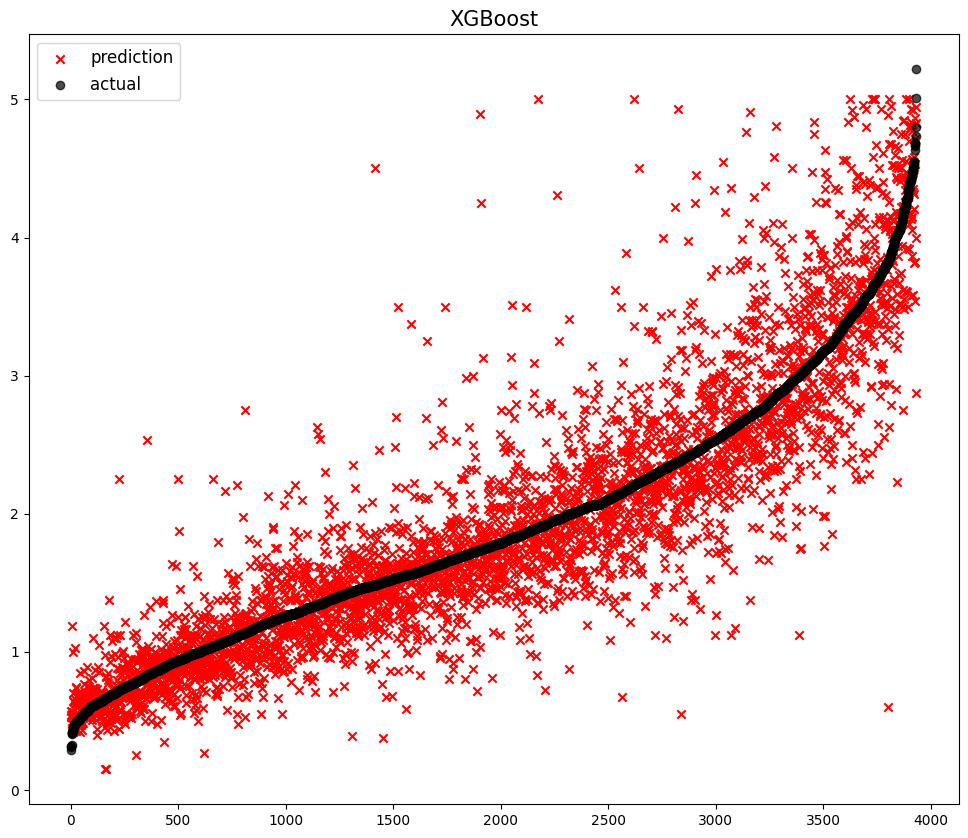

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223379
11                                            XGBoost  0.191983

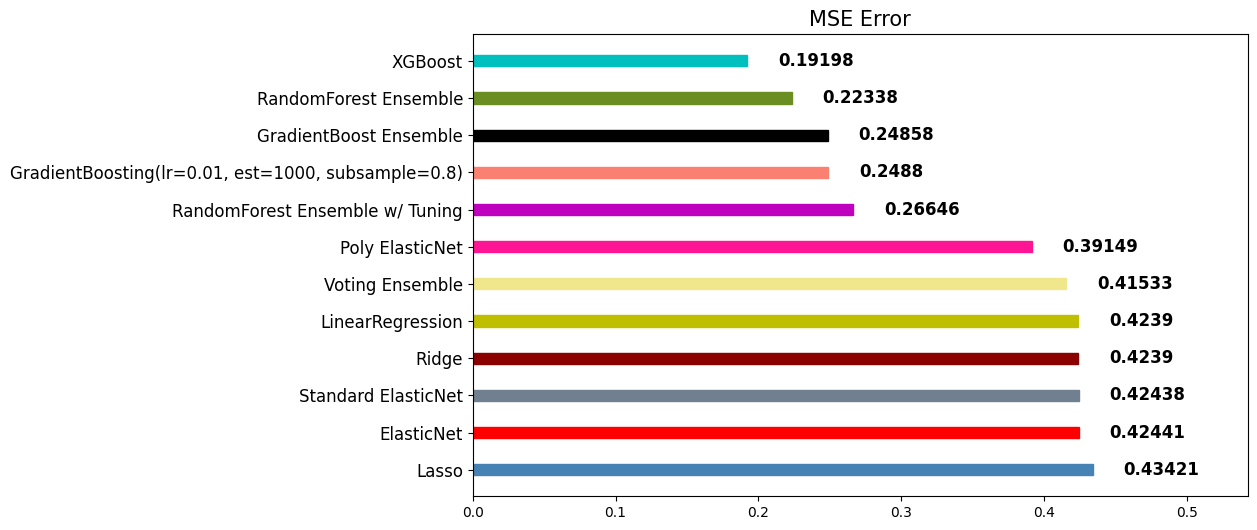

In [46]:
utils.plot_error('XGBoost', xgb_pred, y_test)

**주요 Hyperparameter**
- `random_state`: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 갯수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- `max_depth`: 트리의 깊이. 과대적합 방지용. default=3.
- `subsample`: 샘플 사용 비율. 과대적합 방지용. default=1.0
- `colsample_bytree`: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

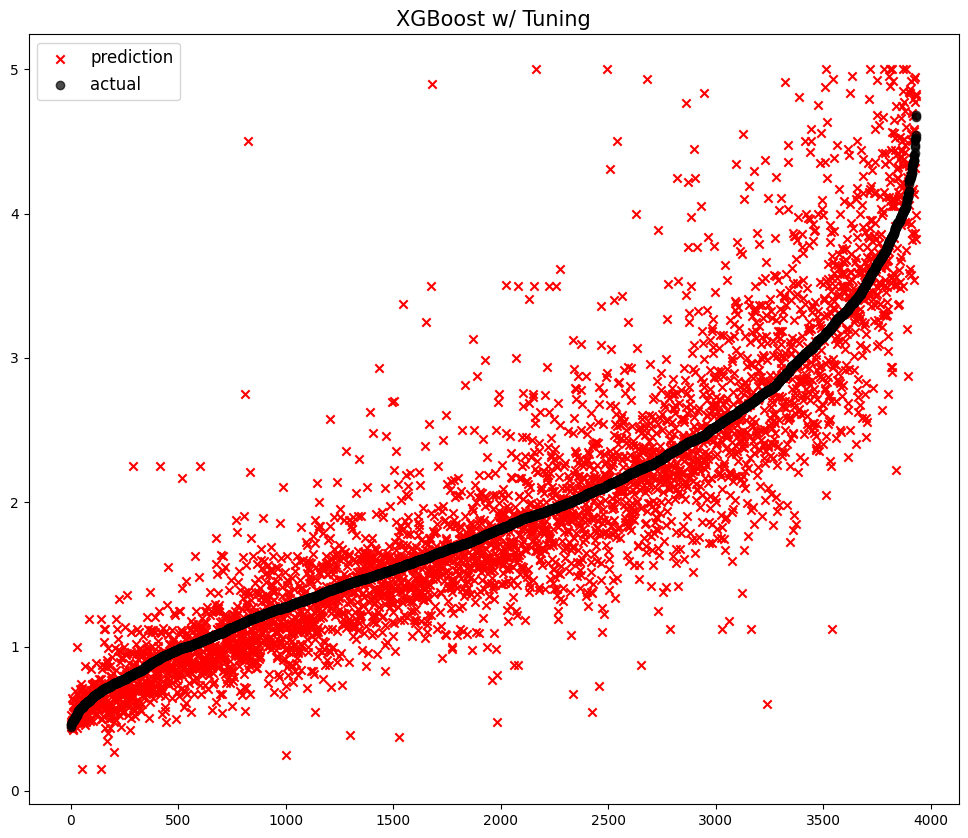

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223379
11                                            XGBoost  0.191983
12                                  XGBoost w/ Tuning  0.180318

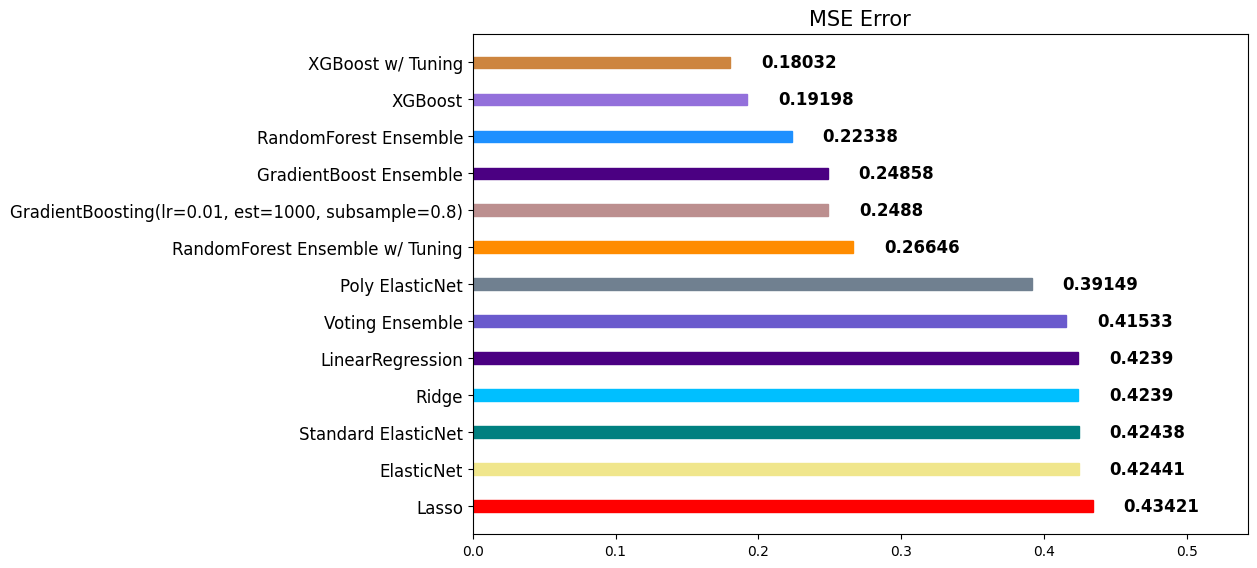

In [47]:
# 하이퍼파라미터 튜닝 수작업 Ver
xgb = XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, max_depth=7)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
utils.plot_error('XGBoost w/ Tuning', xgb_pred, y_test)

### LightGBM

In [48]:
from lightgbm import LGBMRegressor, LGBMClassifier

In [49]:
# 모델 정의 (random_state = 42)
lgbm = LGBMRegressor(random_state=42)

# 모델 학습
lgbm_model = lgbm.fit(X_train, y_train)

# 예측
lgbm_pred = lgbm_model.predict(X_test)

# 성능 평가
lgbm_r2 = r2_score(y_test, lgbm_pred)
lgbm_mse = mean_squared_error(y_test, lgbm_pred)

print(f'R2 : {round(lgbm_r2, 4)}, MSE : {round(lgbm_mse, 4)}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911
R2 : 0.8114, MSE : 0.188


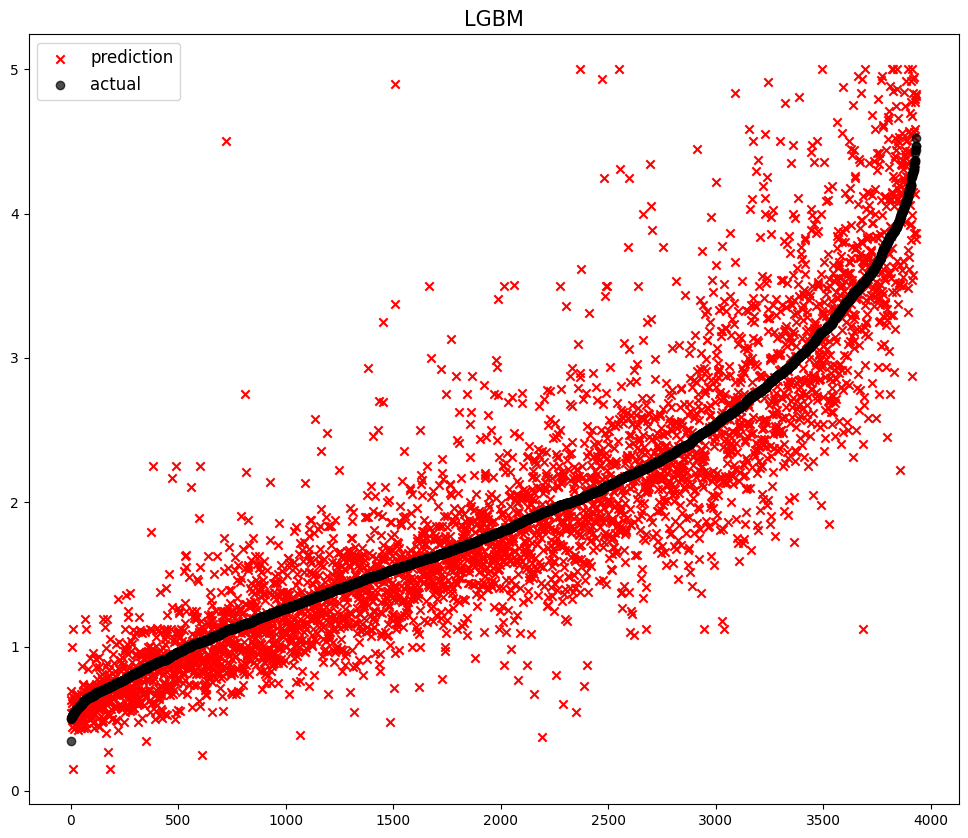

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223379
11                                            XGBoost  0.191983
12                                               LGBM  0.188020
13                                  XGBoost w/ Tuning  0.180318

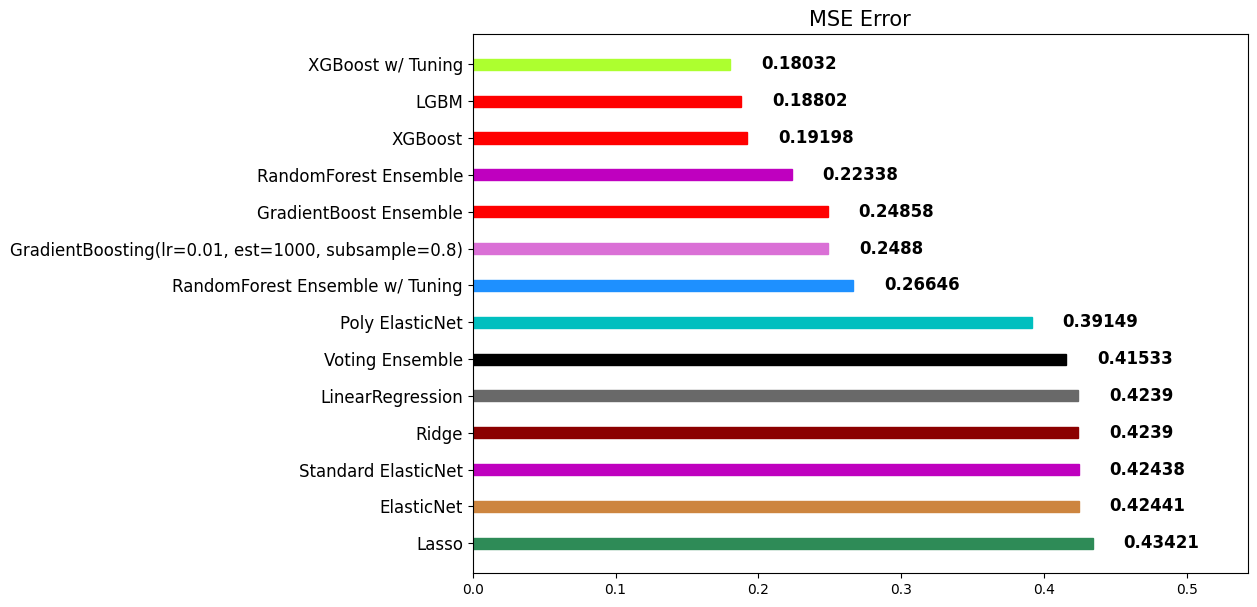

In [50]:
utils.plot_error('LGBM', lgbm_pred, y_test)

**주요 Hyperparameter**
- `random_state`: 랜덤 시드 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 개수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 개수 설정과 비슷한 개념). default=100
- `max_depth`: 트리의 깊이. 과대적합 방지용. default=3.
- `colsample_bytree`: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911


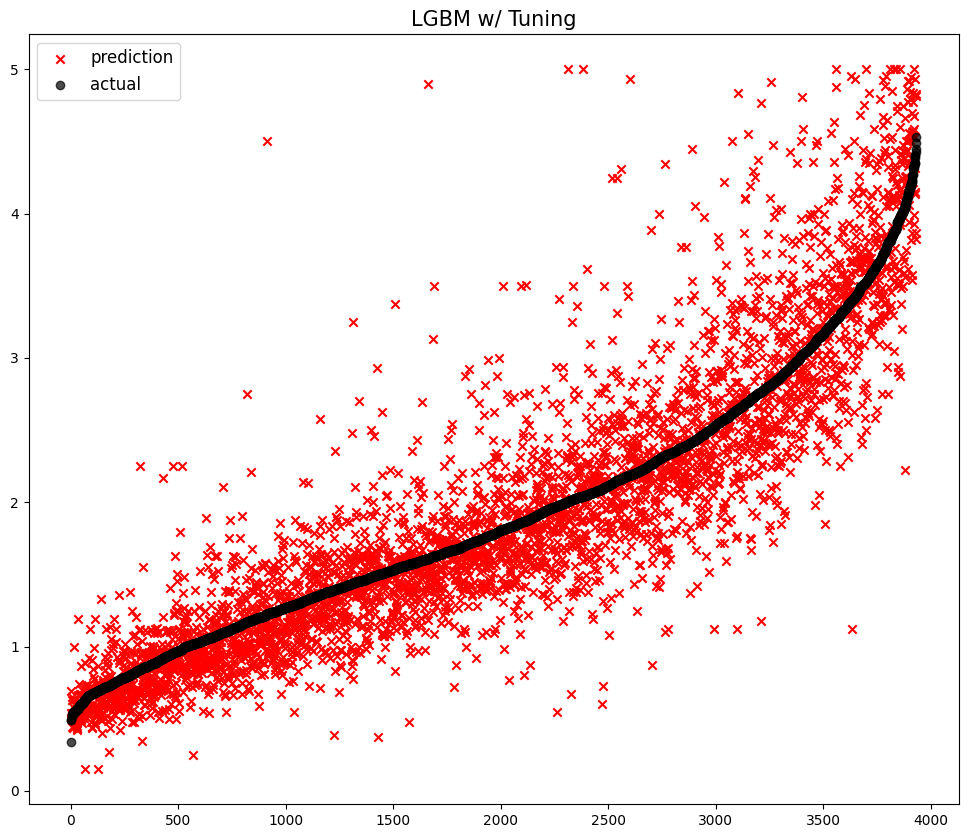

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223379
11                                            XGBoost  0.191983
12                                               LGBM  0.188020
13                                     LGBM w/ Tuning  0.184207
14                                  XGBoost w/ Tuning  0.180318

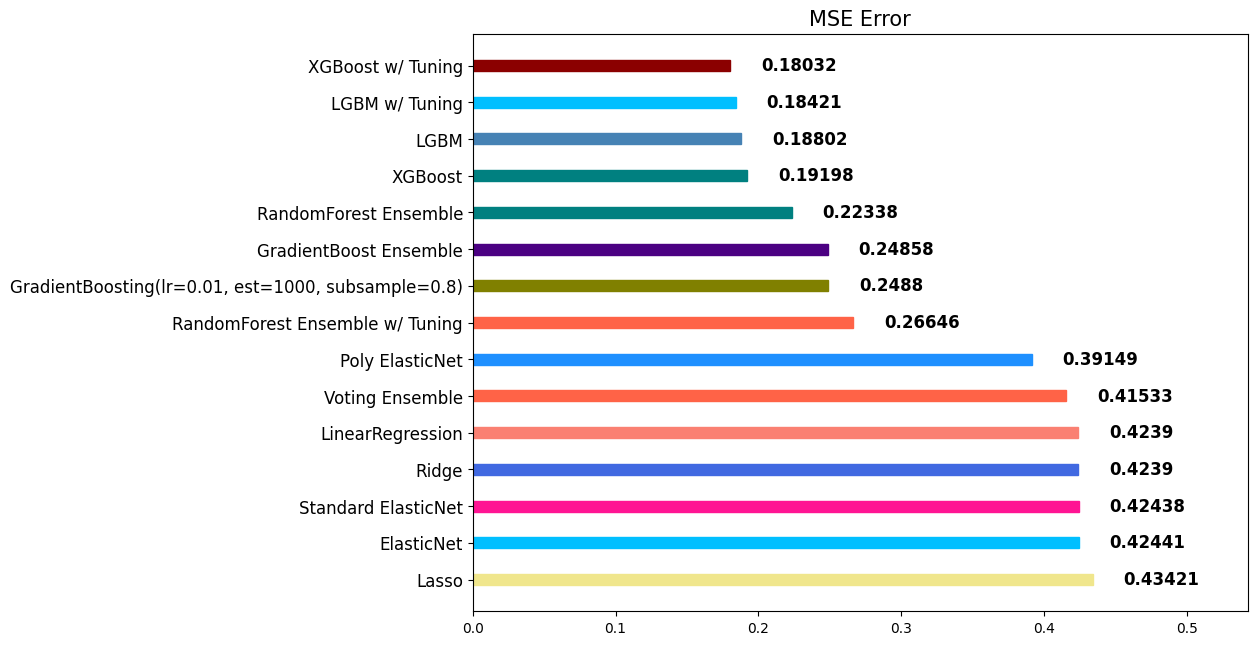

In [51]:
lgbm = LGBMRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, colsample_bytree=0.9, n_jobs=-1)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
utils.plot_error('LGBM w/ Tuning', lgbm_pred, y_test)

## Stacking

[공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html)

In [52]:
from sklearn.ensemble import StackingRegressor

In [53]:
stack_models = [
    ('elasticnet', poly_pipeline),
    ('randomforest', rfr),
    ('gbr', gbr),
    ('lgbm', lgbm),
]

In [54]:
# 원래는 xgb 쓰려고 했는데 오류떠서 걍 릿지로 해보겟습니당..
stack_reg = StackingRegressor(estimators = stack_models, final_estimator=Ridge(), n_jobs=-1)

In [55]:
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_test)

# 성능 평가
stack_r2 = r2_score(y_test, stack_pred)
stack_mse = mean_squared_error(y_test, stack_pred)

print(f'R2 : {round(stack_r2, 4)}, MSE : {round(stack_mse, 4)}')


R2 : 0.822, MSE : 0.1775


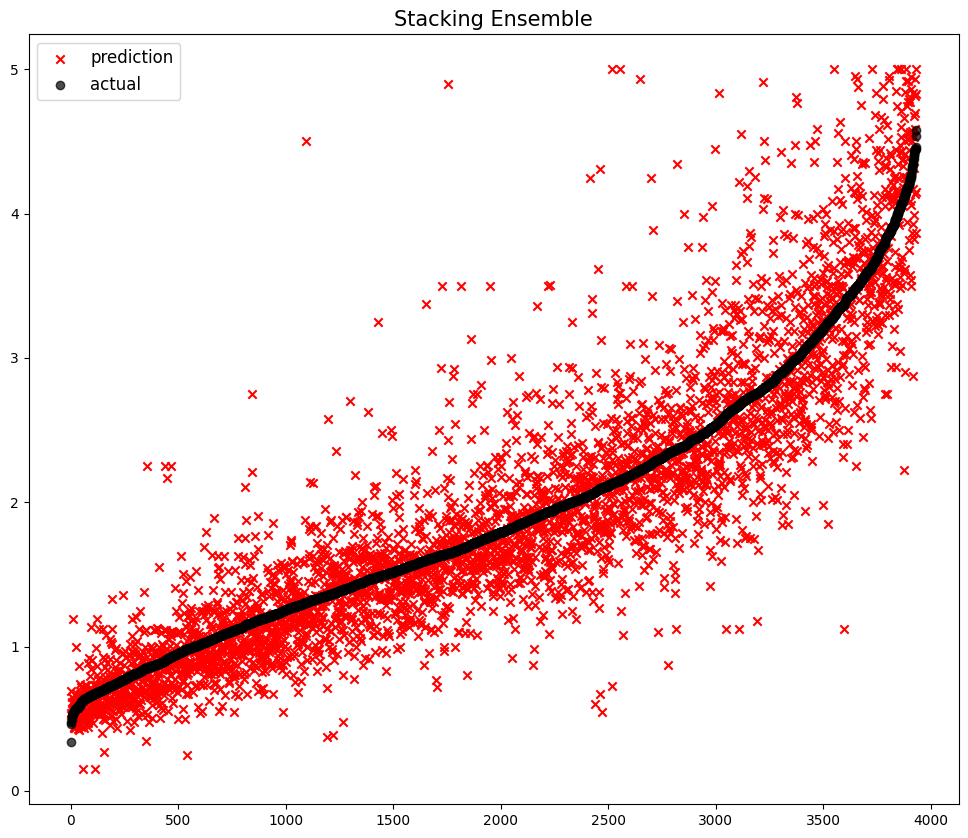

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223379
11                                            XGBoost  0.191983
12                                               LGBM  0.188020
13                                     LGBM w/ Tuning  0.184207
14                                  XGBoost w/ Tuning  0.180318
15                                  Stacking Ensemble  0.177509

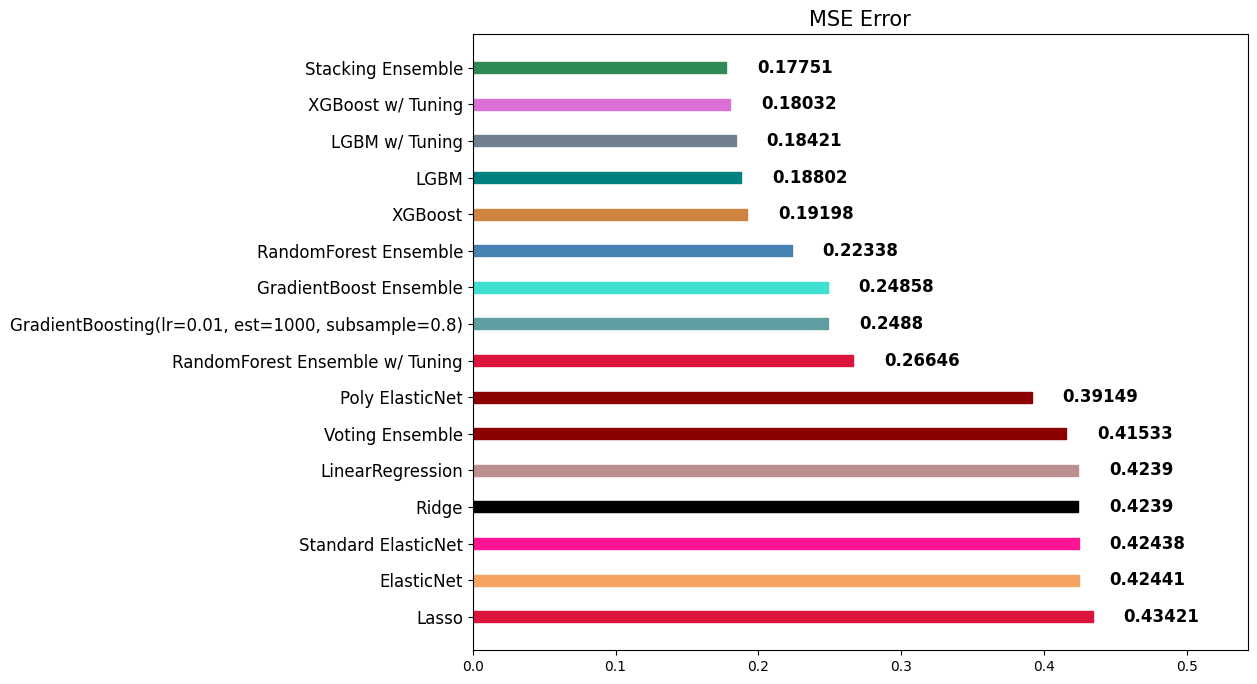

In [56]:
utils.plot_error('Stacking Ensemble', stack_pred, y_test)

# 검증 (Validation)과 튜닝 (Tuning)

## Cross Validation

- Cross Validation이란 모델을 평가하는 하나의 방법입니다.
- K-겹 교차검증(K-fold Cross Validation)을 많이 활용합니다.

- **K-겹 교차검증**은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다.

### K-Fold Cross Validation

In [57]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [58]:
n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=9999, shuffle=True)

In [59]:
lgbm_fold = LGBMRegressor(random_state=42, n_jobs=-1)

In [60]:
i = 1
total_error = 0
for train_index, test_index in kfold.split(X):
    x_train_fold, x_valid_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_valid_fold = y.iloc[train_index], y.iloc[test_index]

    lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_valid_fold)
    error = mean_squared_error(lgbm_pred_fold, y_valid_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.926282
Fold = 1, prediction score = 0.19
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.930059
Fold = 2, prediction score = 0.18
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train s

## Hyperparameter 튜닝

- hypterparameter 튜닝시 경우의 수가 너무 많습니다.
- 따라서, 우리는 자동화할 필요가 있습니다.

sklearn 패키지에서 자주 사용되는 hyperparameter 튜닝을 돕는 클래스는 다음 2가지가 있습니다.

1. **RandomizedSearchCV**
2. **GridSearchCV**

**적용하는 방법**

1. 사용할 Search 방법을 선택합니다.
2. hyperparameter 도메인을 설정합니다. (`max_depth`, `n_estimators`..등등)
3. 학습을 시킨 후, 기다립니다.
4. 도출된 결과 값을 모델에 적용하고 성능을 비교합니다.

## RandomizedSearchCV

- 모든 매개 변수 값이 시도되는 것이 아니라 지정된 분포에서 고정된 수의 매개변수 설정이 샘플링됩니다.
- 시도된 매개 변수 설정의 수는 `n_iter`에 의해 제공됩니다.

**주요 Hyperparameter (LGBM)**
- `random_state`: 랜덤 시드 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 개수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 개수 설정과 비슷한 개념). default=100
- `max_depth`: 트리의 깊이. 과대적합 방지용. default=3.
- `colsample_bytree`: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [61]:
params = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.1, 0.05, 0.025],
    'max_depth': [6, 7, 8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.8, 0.9, 1.0],
}

In [62]:
from sklearn.model_selection import RandomizedSearchCV

`n_iter` 값을 조절하여, 총 몇 회의 시도를 진행할 것인지 정의합니다.

(시도가 늘어나면, 더 좋은 parameter를 찾을 확률은 올라가지만, 그만큼 시간이 오래걸립니다.)

In [63]:
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state=42, cv=3, n_iter=25, n_jobs=-1, scoring='neg_mean_squared_error')

In [64]:
clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.025],
                                        'max_depth': [6, 7, 8],
                                        'n_estimators': [200, 500, 1000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [65]:
abs(clf.best_score_)

np.float64(0.17264292304557105)

In [66]:
clf.best_params_

{'subsample': 0.8,
 'n_estimators': 1000,
 'max_depth': 6,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

In [67]:
LGBMRegressor(**clf.best_params_)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=6,
              n_estimators=1000, subsample=0.8)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

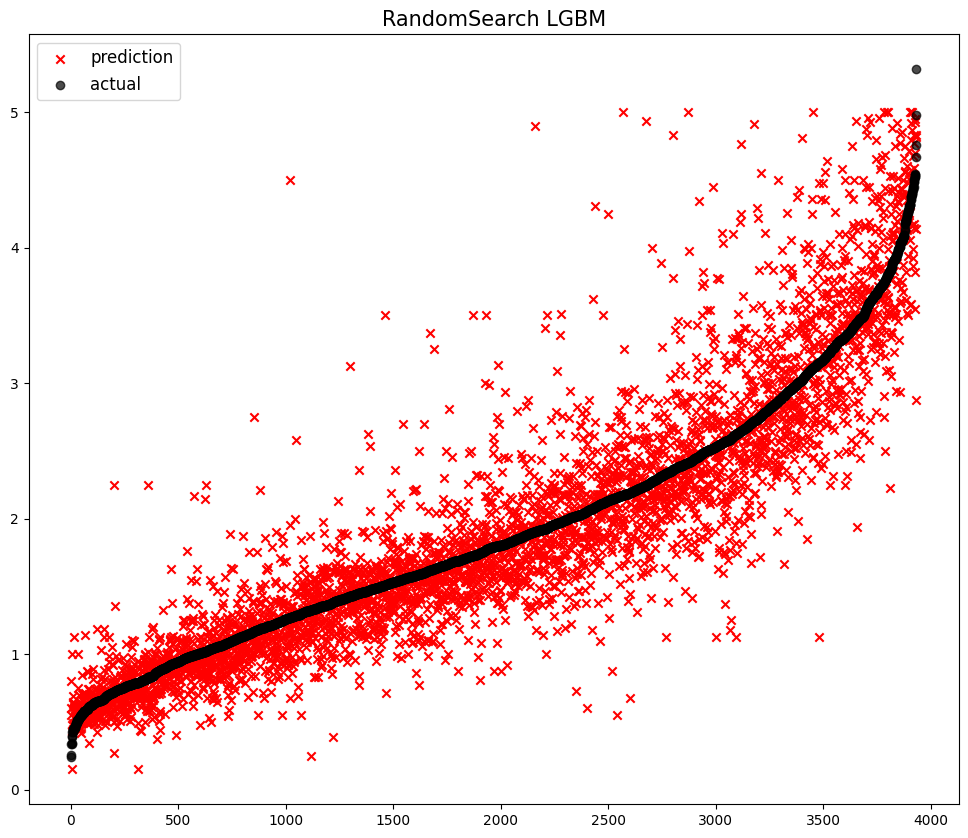

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223379
11                                            XGBoost  0.191983
12                                               LGBM  0.188020
13                                     LGBM w/ Tuning  0.184207
14                                  XGBoost w/ Tuning  0.180318
15                                  Stacking Ensemble  0.177509
16                                  RandomSearch LGBM  0.170242

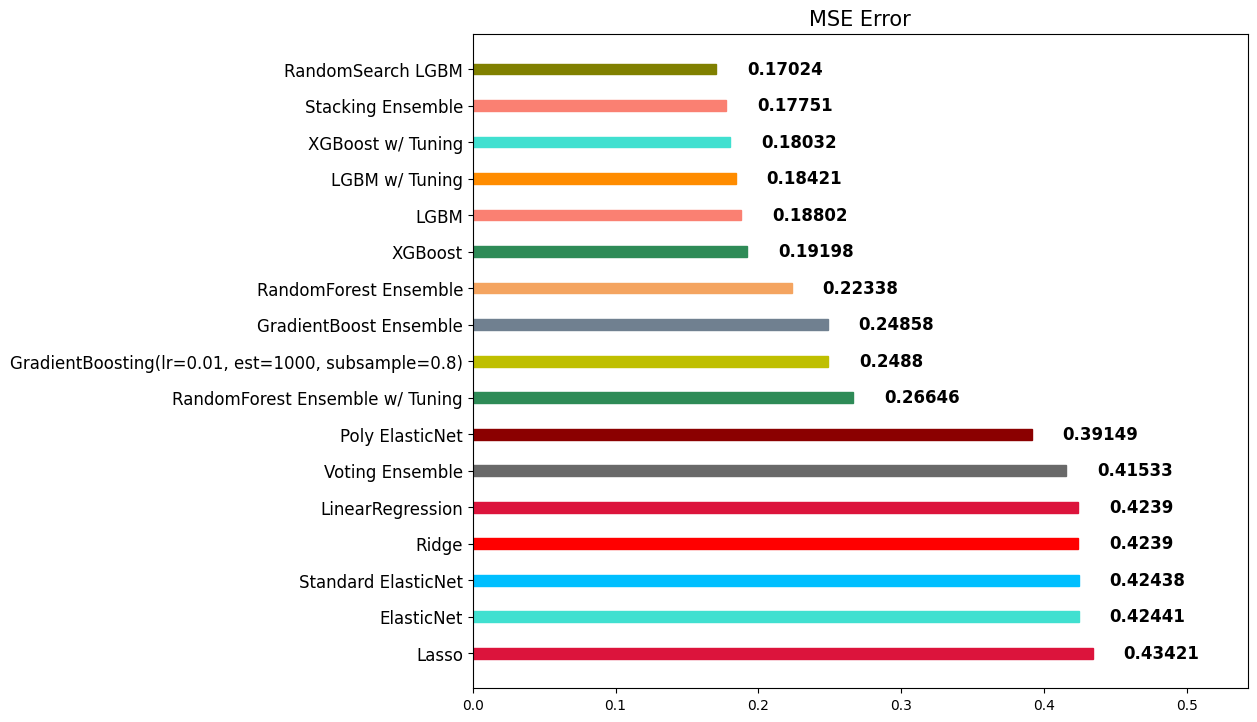

In [68]:
lgbm_best = LGBMRegressor(**clf.best_params_)
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
utils.plot_error('RandomSearch LGBM', lgbm_best_pred, y_test)

## GridSearchCV

- 모든 매개 변수 값에 대하여 **완전 탐색**을 시도합니다.
- 따라서, 최적화할 parameter가 많다면, **시간이 매우 오래** 걸립니다.

In [69]:
params = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.1, 0.05, 0.01],
    'num_leaves': [9, 12, 15],
    'colsample_bytree': [0.8, 0.9],
    'subsample': [0.8, 0.9,],
}

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
grid_search = GridSearchCV(LGBMRegressor(), params, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')

In [72]:
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [500, 1000], 'num_leaves': [9, 12, 15],
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [73]:
abs(grid_search.best_score_)

np.float64(0.17374016071815324)

In [74]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'n_estimators': 1000,
 'num_leaves': 15,
 'subsample': 0.8}

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911


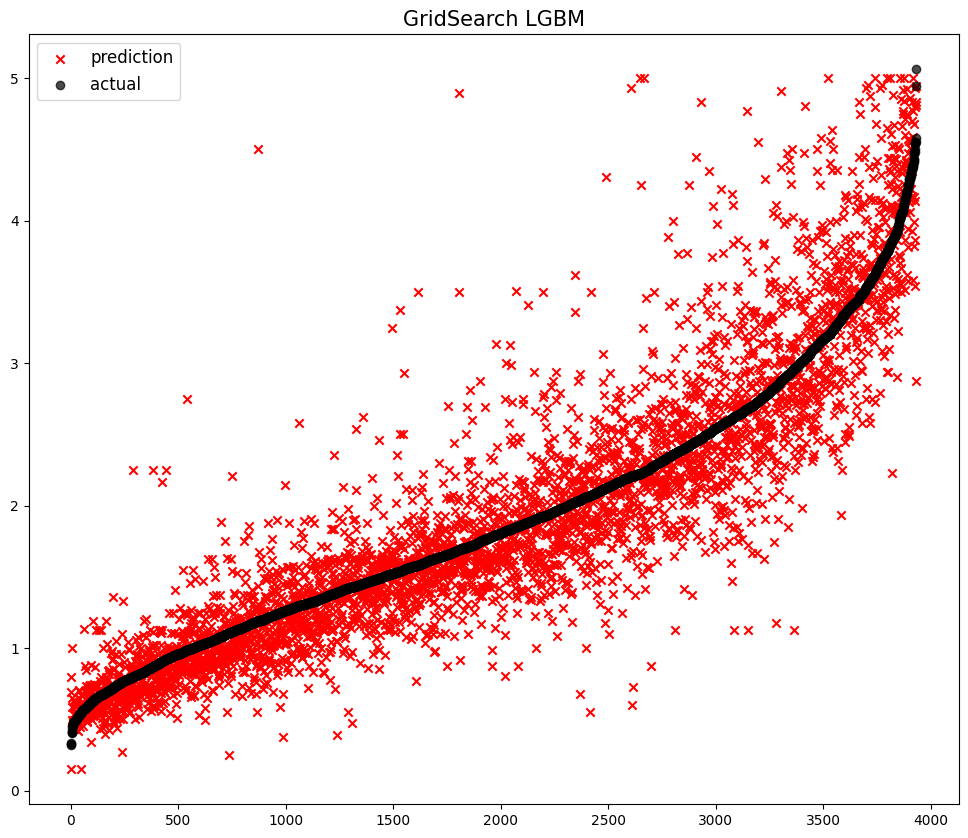

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223379
11                                            XGBoost  0.191983
12                                               LGBM  0.188020
13                                     LGBM w/ Tuning  0.184207
14                                  XGBoost w/ Tuning  0.180318
15                                  Stacking Ensemble  0.177509
16                                    GridSearch LGBM  0.172863
17                                  RandomSearch LGBM  0.170242

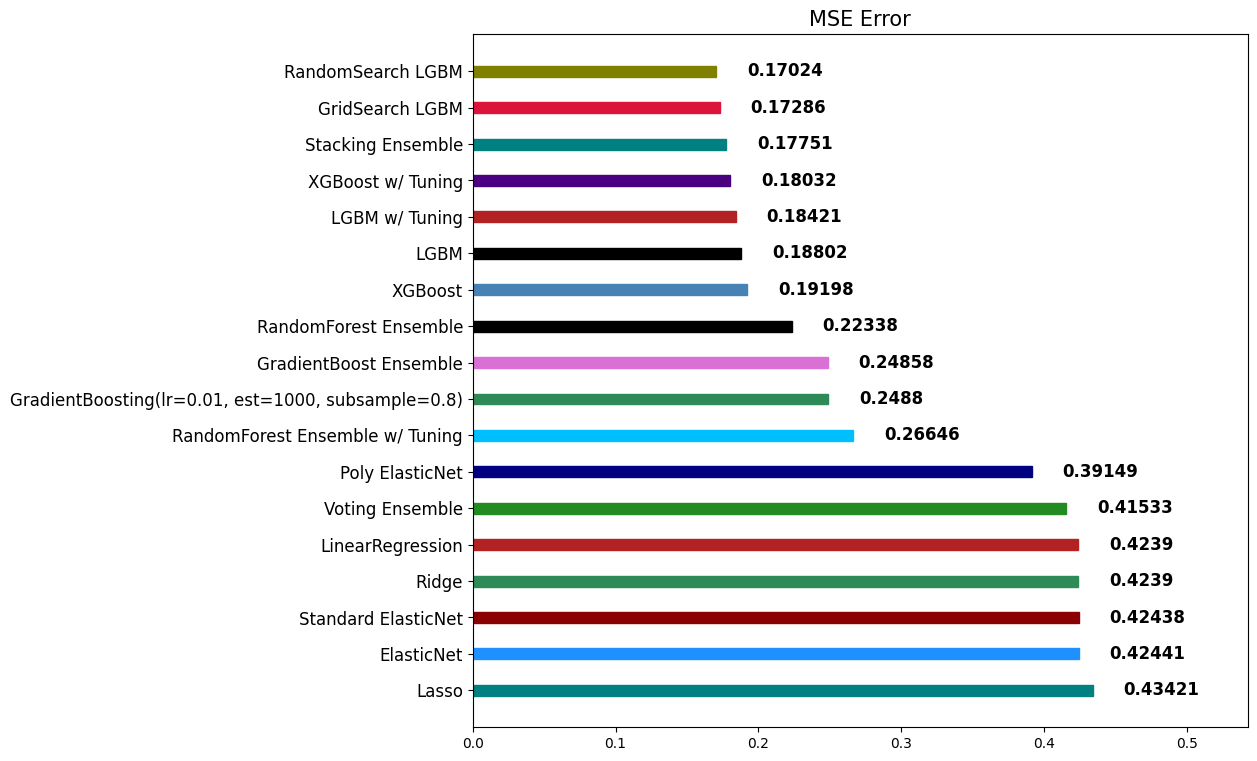

In [75]:
lgbm_best = LGBMRegressor(**grid_search.best_params_)
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
utils.plot_error('GridSearch LGBM', lgbm_best_pred, y_test)

---
---
# [과제2] 모델 성능을 높여봅시다!

이제 직접 다른 전처리 기법, 피쳐 엔지니어링, 앙상블 기법, 추가 하이퍼파라미터 튜닝 등등..을 수행해서  
아래 데이터셋을 활용해 더 높은 정확도를 가지는 모델을 만들어보세요!  
다양한 방법을 수행해보고, 비교한 후 결과를 정리해서 마크다운으로 남겨주시면 되겠습니다.   
이때 각 단계별로 어떤 방법을 수행했는지에 대한 주석을 꼼꼼히 달아주세요.  

- voting, bagging, boosting, stacking 중 어떤 모델을 사용하셔도 됩니다
- 정확도는 소수점 자릿수 제한 없이 모두 출력합니다.
- `random_state`는 모두 'SEED'로 고정해주세요.
- 모델을 출력하는 코드는 아래를 참고하세요

```python
model = #원하는 모델 넣기
model.fit(X_train, y_train)
y_model_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_model_pred)}")
```

In [76]:
# 데이터 분할 및 교차 검증
from sklearn.model_selection import cross_val_score

# 성능 평가 지표
from sklearn.metrics import accuracy_score, classification_report

# 기본 분류 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 앙상블 모델
from sklearn.ensemble import (
    VotingClassifier,      # 보팅
    BaggingClassifier,     # 배깅
    RandomForestClassifier, # 랜덤 포레스트
    AdaBoostClassifier,    # 에이다부스트
    GradientBoostingClassifier, # 그래디언트 부스팅
    StackingClassifier     # 스태킹
)

# 부스팅 라이브러리
import xgboost as xgb           # XGBoost
import lightgbm as lgb          # LightGBM
from catboost import CatBoostClassifier  # CatBoost

SEED = 42

In [77]:
from google.colab import files

uploaded = files.upload()

import pandas as pd
df = pd.read_csv('Telco-Customer-Churn.csv')

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [78]:
# ===== 데이터 준비 =====
# df = pd.read_csv('Telco-Customer-Churn.csv')

target = 'Churn'
X = df.drop(columns=[target, 'customerID'])
y = df[target].map({'Yes': 1, 'No': 0})

## 데이터셋 소개: Telco Customer Churn

<a>https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

### 데이터셋 설명
- **출처**: IBM Sample Data / Kaggle
- **문제 유형**: 이진 분류 (Binary Classification)
- **예측 목표**: 고객의 이탈 여부 예측 (Churn: Yes/No)
- **데이터 크기**: 7,043개 행, 21개 열
- **실무 활용**: 통신사, 구독 서비스 등에서 고객 이탈 방지 전략 수립에 활용

### 주요 특징
- **클래스 불균형**: 이탈 고객 약 27%, 유지 고객 약 73%
- **다양한 변수 유형**: 범주형 변수와 수치형 변수 혼합
- **실무 유사성**: 실제 비즈니스 문제와 매우 유사한 구조

### 변수 설명

#### 1. 고객 정보
- `customerID`: 고객 ID (분석에서 제외)
- `gender`: 성별 (Male/Female)
- `SeniorCitizen`: 고령자 여부 (0/1)
- `Partner`: 배우자 유무 (Yes/No)
- `Dependents`: 부양가족 유무 (Yes/No)

#### 2. 서비스 정보
- `tenure`: 서비스 이용 개월 수
- `PhoneService`: 전화 서비스 가입 여부
- `MultipleLines`: 복수 회선 여부
- `InternetService`: 인터넷 서비스 유형 (DSL/Fiber optic/No)
- `OnlineSecurity`: 온라인 보안 서비스
- `OnlineBackup`: 온라인 백업 서비스
- `DeviceProtection`: 기기 보호 서비스
- `TechSupport`: 기술 지원 서비스
- `StreamingTV`: TV 스트리밍 서비스
- `StreamingMovies`: 영화 스트리밍 서비스

#### 3. 계약 정보
- `Contract`: 계약 유형 (Month-to-month/One year/Two year)
- `PaperlessBilling`: 전자 청구서 사용 여부
- `PaymentMethod`: 결제 방법
- `MonthlyCharges`: 월 요금
- `TotalCharges`: 총 납부 금액

#### 4. 타겟 변수
- `Churn`: 이탈 여부 (Yes/No) - **예측 목표**

In [79]:
# 범주형 변수 인코딩
cat_cols = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# TotalCharges 처리
if X['TotalCharges'].dtype == 'object':
    X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
    X['TotalCharges'].fillna(X['TotalCharges'].median(), inplace=True)

# 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.25,
    random_state=SEED,
    stratify=y
)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터 그리드 정의
param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

model = CatBoostClassifier(random_state=SEED, verbose=0)

# GridSearch 수행
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 최적 파라미터 확인
print("Best Parameters:", grid_search.best_params_)

In [81]:
model = CatBoostClassifier(random_state=SEED)

model.fit(X_train, y_train)
y_model_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_model_pred)}")

Learning rate set to 0.020969
0:	learn: 0.6785569	total: 2.77ms	remaining: 2.77s
1:	learn: 0.6647187	total: 5ms	remaining: 2.5s
2:	learn: 0.6511063	total: 7.31ms	remaining: 2.43s
3:	learn: 0.6394386	total: 9.43ms	remaining: 2.35s
4:	learn: 0.6274847	total: 11.5ms	remaining: 2.28s
5:	learn: 0.6166796	total: 13.6ms	remaining: 2.25s
6:	learn: 0.6060886	total: 15.7ms	remaining: 2.22s
7:	learn: 0.5961352	total: 17.9ms	remaining: 2.22s
8:	learn: 0.5871227	total: 20ms	remaining: 2.21s
9:	learn: 0.5788850	total: 22.1ms	remaining: 2.19s
10:	learn: 0.5706555	total: 24.3ms	remaining: 2.19s
11:	learn: 0.5635109	total: 26.5ms	remaining: 2.18s
12:	learn: 0.5558841	total: 28.6ms	remaining: 2.17s
13:	learn: 0.5484962	total: 30.9ms	remaining: 2.18s
14:	learn: 0.5416610	total: 34.1ms	remaining: 2.24s
15:	learn: 0.5357730	total: 36.2ms	remaining: 2.22s
16:	learn: 0.5293545	total: 38.4ms	remaining: 2.22s
17:	learn: 0.5241355	total: 40.7ms	remaining: 2.22s
18:	learn: 0.5189069	total: 42.8ms	remaining: 2.21

In [82]:
model = CatBoostClassifier(random_state=SEED, depth= 4, iterations= 500, l2_leaf_reg= 1, learning_rate= 0.01)

model.fit(X_train, y_train)
y_model_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_model_pred)}")

0:	learn: 0.6867616	total: 1.94ms	remaining: 967ms
1:	learn: 0.6800965	total: 3.87ms	remaining: 963ms
2:	learn: 0.6739926	total: 5.54ms	remaining: 919ms
3:	learn: 0.6679783	total: 7.18ms	remaining: 891ms
4:	learn: 0.6622157	total: 8.86ms	remaining: 877ms
5:	learn: 0.6562701	total: 10.5ms	remaining: 865ms
6:	learn: 0.6502542	total: 12.1ms	remaining: 854ms
7:	learn: 0.6447744	total: 13.7ms	remaining: 845ms
8:	learn: 0.6391465	total: 15.4ms	remaining: 842ms
9:	learn: 0.6335933	total: 17.1ms	remaining: 835ms
10:	learn: 0.6290194	total: 18.6ms	remaining: 827ms
11:	learn: 0.6241873	total: 20.2ms	remaining: 822ms
12:	learn: 0.6197809	total: 21.8ms	remaining: 818ms
13:	learn: 0.6152249	total: 23.4ms	remaining: 813ms
14:	learn: 0.6108039	total: 25.1ms	remaining: 811ms
15:	learn: 0.6063793	total: 26.7ms	remaining: 808ms
16:	learn: 0.6021493	total: 28.3ms	remaining: 803ms
17:	learn: 0.5981017	total: 29.8ms	remaining: 799ms
18:	learn: 0.5944327	total: 31.6ms	remaining: 799ms
19:	learn: 0.5904970	t

마지막으로, 아래 내용을 마크다운 셀에 정리해주세요
- 1. 과제 1 실행해보며 느낀 점
- 2. 과제 2에서 사용한 모델
- 3. 과제 2 모델 튜닝할 때 사용한 방법, 그리고 그렇게 해서 찾은 하이퍼파라미터값
- 4. 튜닝한 모델로 예측한 결과 (바로 위 셀 출력 결과 복사 붙여넣기)

> 모델 정확도가 가장 높은 3인에게는 깜짝 선물이!!

# 여기에 내용 정리해주세요!

1. 여러 모델들 학습시켜 보며 모델별 작동 원리나 장단점을 다시 한 번씩 읽어봤는데 기억에 잘 남을 것 같습니다.

2. catBoost

3. GridSearch / depth = 4, iterations = 500, l2_leaf_reg = 1, learning_rate = 0.01

4.

0:	learn: 0.6867616	total: 1.94ms	remaining: 967ms
1:	learn: 0.6800965	total: 3.87ms	remaining: 963ms
2:	learn: 0.6739926	total: 5.54ms	remaining: 919ms
3:	learn: 0.6679783	total: 7.18ms	remaining: 891ms
4:	learn: 0.6622157	total: 8.86ms	remaining: 877ms
5:	learn: 0.6562701	total: 10.5ms	remaining: 865ms
6:	learn: 0.6502542	total: 12.1ms	remaining: 854ms
7:	learn: 0.6447744	total: 13.7ms	remaining: 845ms
8:	learn: 0.6391465	total: 15.4ms	remaining: 842ms
9:	learn: 0.6335933	total: 17.1ms	remaining: 835ms
10:	learn: 0.6290194	total: 18.6ms	remaining: 827ms
11:	learn: 0.6241873	total: 20.2ms	remaining: 822ms
12:	learn: 0.6197809	total: 21.8ms	remaining: 818ms
13:	learn: 0.6152249	total: 23.4ms	remaining: 813ms
14:	learn: 0.6108039	total: 25.1ms	remaining: 811ms
15:	learn: 0.6063793	total: 26.7ms	remaining: 808ms
16:	learn: 0.6021493	total: 28.3ms	remaining: 803ms
17:	learn: 0.5981017	total: 29.8ms	remaining: 799ms
18:	learn: 0.5944327	total: 31.6ms	remaining: 799ms
19:	learn: 0.5904970	total: 33.1ms	remaining: 794ms
20:	learn: 0.5867667	total: 34.7ms	remaining: 791ms
21:	learn: 0.5828437	total: 36.3ms	remaining: 788ms
22:	learn: 0.5791704	total: 38.1ms	remaining: 789ms
23:	learn: 0.5759780	total: 39.6ms	remaining: 785ms
24:	learn: 0.5723411	total: 41.2ms	remaining: 783ms
25:	learn: 0.5690607	total: 42.9ms	remaining: 782ms
26:	learn: 0.5656053	total: 44.7ms	remaining: 782ms
27:	learn: 0.5626446	total: 46.2ms	remaining: 780ms
28:	learn: 0.5601115	total: 47.8ms	remaining: 776ms
29:	learn: 0.5574745	total: 49.4ms	remaining: 774ms
30:	learn: 0.5544615	total: 51ms	remaining: 772ms
31:	learn: 0.5514533	total: 52.6ms	remaining: 769ms
32:	learn: 0.5489465	total: 54.1ms	remaining: 766ms
33:	learn: 0.5461979	total: 55.9ms	remaining: 765ms
34:	learn: 0.5437487	total: 57.5ms	remaining: 764ms
35:	learn: 0.5413399	total: 59.2ms	remaining: 763ms
36:	learn: 0.5390246	total: 60.7ms	remaining: 760ms
37:	learn: 0.5364633	total: 62.3ms	remaining: 757ms
38:	learn: 0.5341038	total: 63.9ms	remaining: 756ms
39:	learn: 0.5316209	total: 65.6ms	remaining: 755ms
40:	learn: 0.5294932	total: 67.1ms	remaining: 751ms
41:	learn: 0.5270782	total: 68.6ms	remaining: 748ms
42:	learn: 0.5251045	total: 70.3ms	remaining: 747ms
43:	learn: 0.5227565	total: 71.8ms	remaining: 745ms
44:	learn: 0.5210060	total: 73.5ms	remaining: 743ms
45:	learn: 0.5190296	total: 75.1ms	remaining: 741ms
46:	learn: 0.5171727	total: 76.7ms	remaining: 739ms
47:	learn: 0.5152053	total: 78.3ms	remaining: 737ms
48:	learn: 0.5130655	total: 80ms	remaining: 736ms
49:	learn: 0.5111542	total: 81.6ms	remaining: 734ms
50:	learn: 0.5094159	total: 83.2ms	remaining: 732ms
51:	learn: 0.5077269	total: 84.7ms	remaining: 730ms
52:	learn: 0.5058778	total: 86.4ms	remaining: 728ms
53:	learn: 0.5040608	total: 88.1ms	remaining: 727ms
54:	learn: 0.5022975	total: 89.7ms	remaining: 726ms
55:	learn: 0.5006712	total: 91.4ms	remaining: 725ms
56:	learn: 0.4990504	total: 93.1ms	remaining: 724ms
57:	learn: 0.4975999	total: 94.7ms	remaining: 722ms
58:	learn: 0.4959394	total: 96.4ms	remaining: 720ms
59:	learn: 0.4943291	total: 98.1ms	remaining: 719ms
60:	learn: 0.4929330	total: 99.7ms	remaining: 718ms
61:	learn: 0.4916657	total: 101ms	remaining: 716ms
62:	learn: 0.4901198	total: 103ms	remaining: 714ms
63:	learn: 0.4886986	total: 105ms	remaining: 712ms
64:	learn: 0.4874423	total: 106ms	remaining: 711ms
65:	learn: 0.4861062	total: 108ms	remaining: 710ms
66:	learn: 0.4848365	total: 110ms	remaining: 709ms
67:	learn: 0.4835732	total: 111ms	remaining: 708ms
68:	learn: 0.4822414	total: 113ms	remaining: 706ms
69:	learn: 0.4810337	total: 115ms	remaining: 704ms
70:	learn: 0.4798713	total: 116ms	remaining: 702ms
71:	learn: 0.4784814	total: 118ms	remaining: 701ms
72:	learn: 0.4773112	total: 120ms	remaining: 700ms
73:	learn: 0.4760694	total: 122ms	remaining: 700ms
74:	learn: 0.4749528	total: 123ms	remaining: 698ms
75:	learn: 0.4740408	total: 125ms	remaining: 696ms
76:	learn: 0.4729077	total: 127ms	remaining: 696ms
77:	learn: 0.4719943	total: 128ms	remaining: 695ms
78:	learn: 0.4711009	total: 130ms	remaining: 693ms
79:	learn: 0.4702020	total: 132ms	remaining: 691ms
80:	learn: 0.4691805	total: 133ms	remaining: 690ms
81:	learn: 0.4683644	total: 135ms	remaining: 688ms
82:	learn: 0.4673815	total: 137ms	remaining: 686ms
83:	learn: 0.4663509	total: 138ms	remaining: 686ms
84:	learn: 0.4654188	total: 140ms	remaining: 684ms
85:	learn: 0.4645127	total: 142ms	remaining: 683ms
86:	learn: 0.4636774	total: 144ms	remaining: 681ms
87:	learn: 0.4629397	total: 145ms	remaining: 680ms
88:	learn: 0.4622686	total: 147ms	remaining: 678ms
89:	learn: 0.4614736	total: 148ms	remaining: 676ms
90:	learn: 0.4606859	total: 150ms	remaining: 675ms
91:	learn: 0.4599729	total: 152ms	remaining: 674ms
92:	learn: 0.4592952	total: 154ms	remaining: 672ms
93:	learn: 0.4583358	total: 155ms	remaining: 670ms
94:	learn: 0.4577287	total: 157ms	remaining: 669ms
95:	learn: 0.4570093	total: 159ms	remaining: 667ms
96:	learn: 0.4564173	total: 160ms	remaining: 665ms
97:	learn: 0.4556537	total: 162ms	remaining: 664ms
98:	learn: 0.4550420	total: 164ms	remaining: 662ms
99:	learn: 0.4544342	total: 165ms	remaining: 661ms
100:	learn: 0.4537792	total: 167ms	remaining: 659ms
101:	learn: 0.4531032	total: 168ms	remaining: 657ms
102:	learn: 0.4525014	total: 170ms	remaining: 656ms
103:	learn: 0.4518608	total: 172ms	remaining: 654ms
104:	learn: 0.4511653	total: 173ms	remaining: 652ms
105:	learn: 0.4504133	total: 175ms	remaining: 650ms
106:	learn: 0.4499006	total: 177ms	remaining: 649ms
107:	learn: 0.4493688	total: 178ms	remaining: 647ms
108:	learn: 0.4488200	total: 180ms	remaining: 645ms
109:	learn: 0.4482873	total: 181ms	remaining: 643ms
110:	learn: 0.4476781	total: 183ms	remaining: 642ms
111:	learn: 0.4470010	total: 185ms	remaining: 640ms
112:	learn: 0.4465546	total: 186ms	remaining: 638ms
113:	learn: 0.4459680	total: 188ms	remaining: 637ms
114:	learn: 0.4455296	total: 190ms	remaining: 636ms
115:	learn: 0.4448382	total: 192ms	remaining: 634ms
116:	learn: 0.4443520	total: 193ms	remaining: 632ms
117:	learn: 0.4439192	total: 195ms	remaining: 631ms
118:	learn: 0.4433416	total: 197ms	remaining: 630ms
119:	learn: 0.4427806	total: 202ms	remaining: 639ms
120:	learn: 0.4422952	total: 204ms	remaining: 639ms
121:	learn: 0.4417328	total: 206ms	remaining: 638ms
122:	learn: 0.4412346	total: 208ms	remaining: 636ms
123:	learn: 0.4408160	total: 209ms	remaining: 635ms
124:	learn: 0.4402703	total: 211ms	remaining: 633ms
125:	learn: 0.4399348	total: 213ms	remaining: 631ms
126:	learn: 0.4394595	total: 214ms	remaining: 629ms
127:	learn: 0.4390828	total: 216ms	remaining: 628ms
128:	learn: 0.4386896	total: 218ms	remaining: 626ms
129:	learn: 0.4383335	total: 220ms	remaining: 626ms
130:	learn: 0.4378487	total: 222ms	remaining: 624ms
131:	learn: 0.4373185	total: 223ms	remaining: 622ms
132:	learn: 0.4369762	total: 225ms	remaining: 621ms
133:	learn: 0.4366513	total: 227ms	remaining: 621ms
134:	learn: 0.4362489	total: 229ms	remaining: 619ms
135:	learn: 0.4358919	total: 231ms	remaining: 618ms
136:	learn: 0.4355594	total: 233ms	remaining: 617ms
137:	learn: 0.4352605	total: 235ms	remaining: 615ms
138:	learn: 0.4349085	total: 236ms	remaining: 613ms
139:	learn: 0.4346340	total: 238ms	remaining: 611ms
140:	learn: 0.4342700	total: 240ms	remaining: 611ms
141:	learn: 0.4338588	total: 242ms	remaining: 610ms
142:	learn: 0.4334264	total: 244ms	remaining: 609ms
143:	learn: 0.4329313	total: 246ms	remaining: 607ms
144:	learn: 0.4325150	total: 247ms	remaining: 606ms
145:	learn: 0.4321588	total: 249ms	remaining: 605ms
146:	learn: 0.4318264	total: 251ms	remaining: 603ms
147:	learn: 0.4315150	total: 253ms	remaining: 601ms
148:	learn: 0.4312449	total: 254ms	remaining: 599ms
149:	learn: 0.4309307	total: 256ms	remaining: 597ms
150:	learn: 0.4306859	total: 258ms	remaining: 596ms
151:	learn: 0.4304001	total: 259ms	remaining: 594ms
152:	learn: 0.4300753	total: 261ms	remaining: 592ms
153:	learn: 0.4298658	total: 263ms	remaining: 590ms
154:	learn: 0.4296142	total: 264ms	remaining: 589ms
155:	learn: 0.4293198	total: 266ms	remaining: 587ms
156:	learn: 0.4289730	total: 268ms	remaining: 585ms
157:	learn: 0.4287668	total: 270ms	remaining: 583ms
158:	learn: 0.4284398	total: 271ms	remaining: 582ms
159:	learn: 0.4281378	total: 273ms	remaining: 580ms
160:	learn: 0.4277587	total: 274ms	remaining: 578ms
161:	learn: 0.4274971	total: 276ms	remaining: 576ms
162:	learn: 0.4272612	total: 277ms	remaining: 574ms
163:	learn: 0.4270163	total: 279ms	remaining: 572ms
164:	learn: 0.4267091	total: 281ms	remaining: 570ms
165:	learn: 0.4264409	total: 283ms	remaining: 568ms
166:	learn: 0.4261488	total: 284ms	remaining: 567ms
167:	learn: 0.4258638	total: 286ms	remaining: 565ms
168:	learn: 0.4256418	total: 288ms	remaining: 563ms
169:	learn: 0.4254132	total: 289ms	remaining: 561ms
170:	learn: 0.4251505	total: 291ms	remaining: 560ms
171:	learn: 0.4249962	total: 293ms	remaining: 558ms
172:	learn: 0.4246646	total: 294ms	remaining: 556ms
173:	learn: 0.4244298	total: 296ms	remaining: 554ms
174:	learn: 0.4241257	total: 297ms	remaining: 552ms
175:	learn: 0.4238875	total: 299ms	remaining: 551ms
176:	learn: 0.4237023	total: 301ms	remaining: 549ms
177:	learn: 0.4234981	total: 302ms	remaining: 547ms
178:	learn: 0.4232720	total: 304ms	remaining: 545ms
179:	learn: 0.4231027	total: 306ms	remaining: 543ms
180:	learn: 0.4229400	total: 307ms	remaining: 541ms
181:	learn: 0.4227609	total: 309ms	remaining: 539ms
182:	learn: 0.4225498	total: 310ms	remaining: 538ms
183:	learn: 0.4222872	total: 312ms	remaining: 536ms
184:	learn: 0.4221044	total: 314ms	remaining: 534ms
185:	learn: 0.4219444	total: 315ms	remaining: 533ms
186:	learn: 0.4216924	total: 317ms	remaining: 531ms
187:	learn: 0.4215121	total: 319ms	remaining: 529ms
188:	learn: 0.4212956	total: 320ms	remaining: 527ms
189:	learn: 0.4211158	total: 322ms	remaining: 525ms
190:	learn: 0.4209360	total: 324ms	remaining: 524ms
191:	learn: 0.4207453	total: 325ms	remaining: 522ms
192:	learn: 0.4205729	total: 327ms	remaining: 520ms
193:	learn: 0.4203765	total: 328ms	remaining: 518ms
194:	learn: 0.4202328	total: 330ms	remaining: 517ms
195:	learn: 0.4200902	total: 332ms	remaining: 515ms
196:	learn: 0.4199099	total: 334ms	remaining: 513ms
197:	learn: 0.4197473	total: 335ms	remaining: 511ms
198:	learn: 0.4195595	total: 337ms	remaining: 510ms
199:	learn: 0.4193669	total: 338ms	remaining: 508ms
200:	learn: 0.4192260	total: 340ms	remaining: 506ms
201:	learn: 0.4190742	total: 342ms	remaining: 504ms
202:	learn: 0.4189334	total: 344ms	remaining: 503ms
203:	learn: 0.4187632	total: 346ms	remaining: 501ms
204:	learn: 0.4186245	total: 347ms	remaining: 500ms
205:	learn: 0.4184424	total: 349ms	remaining: 498ms
206:	learn: 0.4182483	total: 351ms	remaining: 496ms
207:	learn: 0.4180768	total: 352ms	remaining: 494ms
208:	learn: 0.4179199	total: 354ms	remaining: 493ms
209:	learn: 0.4177101	total: 355ms	remaining: 491ms
210:	learn: 0.4175469	total: 357ms	remaining: 489ms
211:	learn: 0.4173433	total: 359ms	remaining: 487ms
212:	learn: 0.4172010	total: 360ms	remaining: 486ms
213:	learn: 0.4170340	total: 362ms	remaining: 484ms
214:	learn: 0.4169074	total: 364ms	remaining: 482ms
215:	learn: 0.4167814	total: 365ms	remaining: 480ms
216:	learn: 0.4166536	total: 367ms	remaining: 478ms
217:	learn: 0.4164993	total: 368ms	remaining: 476ms
218:	learn: 0.4163876	total: 370ms	remaining: 475ms
219:	learn: 0.4162397	total: 372ms	remaining: 473ms
220:	learn: 0.4160429	total: 373ms	remaining: 471ms
221:	learn: 0.4159271	total: 375ms	remaining: 469ms
222:	learn: 0.4157479	total: 376ms	remaining: 468ms
223:	learn: 0.4156832	total: 380ms	remaining: 468ms
224:	learn: 0.4155261	total: 382ms	remaining: 467ms
225:	learn: 0.4153960	total: 384ms	remaining: 466ms
226:	learn: 0.4152757	total: 386ms	remaining: 465ms
227:	learn: 0.4151581	total: 388ms	remaining: 463ms
228:	learn: 0.4150292	total: 390ms	remaining: 462ms
229:	learn: 0.4149198	total: 392ms	remaining: 460ms
230:	learn: 0.4147987	total: 398ms	remaining: 464ms
231:	learn: 0.4146526	total: 403ms	remaining: 465ms
232:	learn: 0.4144958	total: 405ms	remaining: 464ms
233:	learn: 0.4143796	total: 407ms	remaining: 463ms
234:	learn: 0.4142613	total: 411ms	remaining: 463ms
235:	learn: 0.4141603	total: 413ms	remaining: 462ms
236:	learn: 0.4140298	total: 415ms	remaining: 461ms
237:	learn: 0.4139209	total: 417ms	remaining: 459ms
238:	learn: 0.4137775	total: 419ms	remaining: 458ms
239:	learn: 0.4136756	total: 421ms	remaining: 457ms
240:	learn: 0.4135600	total: 424ms	remaining: 456ms
241:	learn: 0.4134296	total: 426ms	remaining: 454ms
242:	learn: 0.4133503	total: 428ms	remaining: 452ms
243:	learn: 0.4132456	total: 429ms	remaining: 450ms
244:	learn: 0.4131485	total: 431ms	remaining: 448ms
245:	learn: 0.4130385	total: 432ms	remaining: 447ms
246:	learn: 0.4129493	total: 434ms	remaining: 445ms
247:	learn: 0.4128296	total: 436ms	remaining: 443ms
248:	learn: 0.4126975	total: 437ms	remaining: 441ms
249:	learn: 0.4125966	total: 439ms	remaining: 439ms
250:	learn: 0.4124608	total: 440ms	remaining: 437ms
251:	learn: 0.4123693	total: 442ms	remaining: 435ms
252:	learn: 0.4122460	total: 444ms	remaining: 433ms
253:	learn: 0.4121496	total: 445ms	remaining: 431ms
254:	learn: 0.4120566	total: 447ms	remaining: 429ms
255:	learn: 0.4119712	total: 448ms	remaining: 427ms
256:	learn: 0.4118815	total: 450ms	remaining: 426ms
257:	learn: 0.4117629	total: 452ms	remaining: 424ms
258:	learn: 0.4116964	total: 453ms	remaining: 422ms
259:	learn: 0.4115956	total: 455ms	remaining: 420ms
260:	learn: 0.4115206	total: 457ms	remaining: 418ms
261:	learn: 0.4114229	total: 458ms	remaining: 416ms
262:	learn: 0.4113278	total: 460ms	remaining: 415ms
263:	learn: 0.4112287	total: 462ms	remaining: 413ms
264:	learn: 0.4111418	total: 464ms	remaining: 411ms
265:	learn: 0.4110391	total: 465ms	remaining: 409ms
266:	learn: 0.4109658	total: 467ms	remaining: 408ms
267:	learn: 0.4108881	total: 469ms	remaining: 406ms
268:	learn: 0.4107723	total: 470ms	remaining: 404ms
269:	learn: 0.4106697	total: 472ms	remaining: 402ms
270:	learn: 0.4105750	total: 474ms	remaining: 400ms
271:	learn: 0.4105586	total: 475ms	remaining: 398ms
272:	learn: 0.4104715	total: 477ms	remaining: 396ms
273:	learn: 0.4103844	total: 478ms	remaining: 395ms
274:	learn: 0.4103108	total: 480ms	remaining: 393ms
275:	learn: 0.4102397	total: 482ms	remaining: 391ms
276:	learn: 0.4101128	total: 483ms	remaining: 389ms
277:	learn: 0.4100571	total: 485ms	remaining: 387ms
278:	learn: 0.4099800	total: 487ms	remaining: 386ms
279:	learn: 0.4098993	total: 488ms	remaining: 384ms
280:	learn: 0.4098403	total: 490ms	remaining: 382ms
281:	learn: 0.4097360	total: 492ms	remaining: 380ms
282:	learn: 0.4096589	total: 493ms	remaining: 378ms
283:	learn: 0.4095869	total: 495ms	remaining: 377ms
284:	learn: 0.4094968	total: 497ms	remaining: 375ms
285:	learn: 0.4094171	total: 498ms	remaining: 373ms
286:	learn: 0.4093184	total: 500ms	remaining: 371ms
287:	learn: 0.4092463	total: 502ms	remaining: 369ms
288:	learn: 0.4091582	total: 503ms	remaining: 367ms
289:	learn: 0.4091448	total: 504ms	remaining: 365ms
290:	learn: 0.4090653	total: 506ms	remaining: 363ms
291:	learn: 0.4089972	total: 508ms	remaining: 362ms
292:	learn: 0.4088958	total: 509ms	remaining: 360ms
293:	learn: 0.4088227	total: 511ms	remaining: 358ms
294:	learn: 0.4087621	total: 513ms	remaining: 356ms
295:	learn: 0.4086588	total: 515ms	remaining: 355ms
296:	learn: 0.4085853	total: 517ms	remaining: 353ms
297:	learn: 0.4085177	total: 518ms	remaining: 351ms
298:	learn: 0.4084372	total: 520ms	remaining: 349ms
299:	learn: 0.4083771	total: 521ms	remaining: 348ms
300:	learn: 0.4083086	total: 523ms	remaining: 346ms
301:	learn: 0.4082108	total: 525ms	remaining: 344ms
302:	learn: 0.4081268	total: 526ms	remaining: 342ms
303:	learn: 0.4080335	total: 528ms	remaining: 340ms
304:	learn: 0.4079683	total: 530ms	remaining: 339ms
305:	learn: 0.4079019	total: 531ms	remaining: 337ms
306:	learn: 0.4078185	total: 533ms	remaining: 335ms
307:	learn: 0.4077385	total: 535ms	remaining: 333ms
308:	learn: 0.4076500	total: 536ms	remaining: 331ms
309:	learn: 0.4075898	total: 538ms	remaining: 330ms
310:	learn: 0.4074785	total: 540ms	remaining: 328ms
311:	learn: 0.4074040	total: 541ms	remaining: 326ms
312:	learn: 0.4073208	total: 543ms	remaining: 324ms
313:	learn: 0.4072409	total: 544ms	remaining: 322ms
314:	learn: 0.4071464	total: 546ms	remaining: 321ms
315:	learn: 0.4070802	total: 548ms	remaining: 319ms
316:	learn: 0.4070218	total: 549ms	remaining: 317ms
317:	learn: 0.4069379	total: 551ms	remaining: 315ms
318:	learn: 0.4068515	total: 552ms	remaining: 313ms
319:	learn: 0.4068042	total: 554ms	remaining: 312ms
320:	learn: 0.4067568	total: 556ms	remaining: 310ms
321:	learn: 0.4066783	total: 557ms	remaining: 308ms
322:	learn: 0.4065881	total: 559ms	remaining: 306ms
323:	learn: 0.4065186	total: 561ms	remaining: 304ms
324:	learn: 0.4064599	total: 562ms	remaining: 303ms
325:	learn: 0.4063895	total: 564ms	remaining: 301ms
326:	learn: 0.4062946	total: 565ms	remaining: 299ms
327:	learn: 0.4062360	total: 567ms	remaining: 297ms
328:	learn: 0.4061572	total: 568ms	remaining: 295ms
329:	learn: 0.4060646	total: 570ms	remaining: 294ms
330:	learn: 0.4059679	total: 572ms	remaining: 292ms
331:	learn: 0.4058848	total: 573ms	remaining: 290ms
332:	learn: 0.4058033	total: 575ms	remaining: 288ms
333:	learn: 0.4057319	total: 577ms	remaining: 287ms
334:	learn: 0.4056614	total: 578ms	remaining: 285ms
335:	learn: 0.4055965	total: 580ms	remaining: 283ms
336:	learn: 0.4055366	total: 582ms	remaining: 281ms
337:	learn: 0.4055086	total: 583ms	remaining: 279ms
338:	learn: 0.4054433	total: 585ms	remaining: 278ms
339:	learn: 0.4053776	total: 586ms	remaining: 276ms
340:	learn: 0.4053211	total: 588ms	remaining: 274ms
341:	learn: 0.4052457	total: 590ms	remaining: 273ms
342:	learn: 0.4051653	total: 594ms	remaining: 272ms
343:	learn: 0.4050966	total: 596ms	remaining: 270ms
344:	learn: 0.4050343	total: 598ms	remaining: 268ms
345:	learn: 0.4050075	total: 599ms	remaining: 267ms
346:	learn: 0.4049654	total: 601ms	remaining: 265ms
347:	learn: 0.4049222	total: 602ms	remaining: 263ms
348:	learn: 0.4048325	total: 604ms	remaining: 261ms
349:	learn: 0.4047734	total: 606ms	remaining: 260ms
350:	learn: 0.4047306	total: 607ms	remaining: 258ms
351:	learn: 0.4046443	total: 609ms	remaining: 256ms
352:	learn: 0.4046081	total: 611ms	remaining: 254ms
353:	learn: 0.4045697	total: 612ms	remaining: 253ms
354:	learn: 0.4045046	total: 614ms	remaining: 251ms
355:	learn: 0.4044082	total: 616ms	remaining: 249ms
356:	learn: 0.4043392	total: 617ms	remaining: 247ms
357:	learn: 0.4043120	total: 619ms	remaining: 246ms
358:	learn: 0.4042614	total: 621ms	remaining: 244ms
359:	learn: 0.4041673	total: 622ms	remaining: 242ms
360:	learn: 0.4041003	total: 624ms	remaining: 240ms
361:	learn: 0.4040307	total: 626ms	remaining: 239ms
362:	learn: 0.4039835	total: 627ms	remaining: 237ms
363:	learn: 0.4039233	total: 629ms	remaining: 235ms
364:	learn: 0.4038776	total: 631ms	remaining: 233ms
365:	learn: 0.4038126	total: 632ms	remaining: 232ms
366:	learn: 0.4037787	total: 634ms	remaining: 230ms
367:	learn: 0.4037486	total: 636ms	remaining: 228ms
368:	learn: 0.4036850	total: 637ms	remaining: 226ms
369:	learn: 0.4036320	total: 639ms	remaining: 225ms
370:	learn: 0.4035569	total: 641ms	remaining: 223ms
371:	learn: 0.4035210	total: 642ms	remaining: 221ms
372:	learn: 0.4034728	total: 644ms	remaining: 219ms
373:	learn: 0.4034261	total: 646ms	remaining: 218ms
374:	learn: 0.4033784	total: 647ms	remaining: 216ms
375:	learn: 0.4033189	total: 649ms	remaining: 214ms
376:	learn: 0.4032689	total: 650ms	remaining: 212ms
377:	learn: 0.4032123	total: 652ms	remaining: 210ms
378:	learn: 0.4031614	total: 654ms	remaining: 209ms
379:	learn: 0.4031049	total: 655ms	remaining: 207ms
380:	learn: 0.4030622	total: 657ms	remaining: 205ms
381:	learn: 0.4030180	total: 658ms	remaining: 203ms
382:	learn: 0.4029754	total: 660ms	remaining: 202ms
383:	learn: 0.4029371	total: 661ms	remaining: 200ms
384:	learn: 0.4028757	total: 663ms	remaining: 198ms
385:	learn: 0.4027803	total: 665ms	remaining: 196ms
386:	learn: 0.4027176	total: 666ms	remaining: 195ms
387:	learn: 0.4026568	total: 668ms	remaining: 193ms
388:	learn: 0.4026290	total: 670ms	remaining: 191ms
389:	learn: 0.4025766	total: 671ms	remaining: 189ms
390:	learn: 0.4025382	total: 673ms	remaining: 188ms
391:	learn: 0.4024932	total: 674ms	remaining: 186ms
392:	learn: 0.4024517	total: 676ms	remaining: 184ms
393:	learn: 0.4023907	total: 677ms	remaining: 182ms
394:	learn: 0.4023276	total: 679ms	remaining: 180ms
395:	learn: 0.4022873	total: 681ms	remaining: 179ms
396:	learn: 0.4022413	total: 682ms	remaining: 177ms
397:	learn: 0.4021891	total: 684ms	remaining: 175ms
398:	learn: 0.4021440	total: 686ms	remaining: 174ms
399:	learn: 0.4020977	total: 687ms	remaining: 172ms
400:	learn: 0.4020420	total: 689ms	remaining: 170ms
401:	learn: 0.4020119	total: 691ms	remaining: 168ms
402:	learn: 0.4019539	total: 692ms	remaining: 167ms
403:	learn: 0.4018864	total: 694ms	remaining: 165ms
404:	learn: 0.4018548	total: 696ms	remaining: 163ms
405:	learn: 0.4017974	total: 697ms	remaining: 161ms
406:	learn: 0.4017695	total: 699ms	remaining: 160ms
407:	learn: 0.4017385	total: 700ms	remaining: 158ms
408:	learn: 0.4016854	total: 702ms	remaining: 156ms
409:	learn: 0.4016455	total: 704ms	remaining: 155ms
410:	learn: 0.4016071	total: 706ms	remaining: 153ms
411:	learn: 0.4015648	total: 708ms	remaining: 151ms
412:	learn: 0.4015294	total: 709ms	remaining: 149ms
413:	learn: 0.4014839	total: 711ms	remaining: 148ms
414:	learn: 0.4014397	total: 713ms	remaining: 146ms
415:	learn: 0.4014050	total: 715ms	remaining: 144ms
416:	learn: 0.4013691	total: 716ms	remaining: 143ms
417:	learn: 0.4012660	total: 718ms	remaining: 141ms
418:	learn: 0.4012161	total: 719ms	remaining: 139ms
419:	learn: 0.4011789	total: 721ms	remaining: 137ms
420:	learn: 0.4011440	total: 722ms	remaining: 136ms
421:	learn: 0.4011184	total: 724ms	remaining: 134ms
422:	learn: 0.4010775	total: 725ms	remaining: 132ms
423:	learn: 0.4010317	total: 727ms	remaining: 130ms
424:	learn: 0.4009817	total: 729ms	remaining: 129ms
425:	learn: 0.4009192	total: 730ms	remaining: 127ms
426:	learn: 0.4008756	total: 732ms	remaining: 125ms
427:	learn: 0.4008368	total: 733ms	remaining: 123ms
428:	learn: 0.4008070	total: 735ms	remaining: 122ms
429:	learn: 0.4007558	total: 736ms	remaining: 120ms
430:	learn: 0.4007338	total: 738ms	remaining: 118ms
431:	learn: 0.4006965	total: 740ms	remaining: 116ms
432:	learn: 0.4006328	total: 742ms	remaining: 115ms
433:	learn: 0.4005888	total: 743ms	remaining: 113ms
434:	learn: 0.4005423	total: 745ms	remaining: 111ms
435:	learn: 0.4004901	total: 747ms	remaining: 110ms
436:	learn: 0.4004702	total: 748ms	remaining: 108ms
437:	learn: 0.4004360	total: 750ms	remaining: 106ms
438:	learn: 0.4003772	total: 751ms	remaining: 104ms
439:	learn: 0.4003168	total: 753ms	remaining: 103ms
440:	learn: 0.4002606	total: 754ms	remaining: 101ms
441:	learn: 0.4002035	total: 756ms	remaining: 99.2ms
442:	learn: 0.4001736	total: 758ms	remaining: 97.5ms
443:	learn: 0.4001159	total: 759ms	remaining: 95.8ms
444:	learn: 0.4000789	total: 761ms	remaining: 94.1ms
445:	learn: 0.4000454	total: 763ms	remaining: 92.3ms
446:	learn: 0.3999945	total: 764ms	remaining: 90.6ms
447:	learn: 0.3999618	total: 766ms	remaining: 88.9ms
448:	learn: 0.3999262	total: 768ms	remaining: 87.2ms
449:	learn: 0.3998658	total: 769ms	remaining: 85.5ms
450:	learn: 0.3998256	total: 771ms	remaining: 83.7ms
451:	learn: 0.3997834	total: 772ms	remaining: 82ms
452:	learn: 0.3997482	total: 774ms	remaining: 80.3ms
453:	learn: 0.3997131	total: 776ms	remaining: 78.6ms
454:	learn: 0.3996923	total: 777ms	remaining: 76.9ms
455:	learn: 0.3996442	total: 779ms	remaining: 75.2ms
456:	learn: 0.3996070	total: 780ms	remaining: 73.4ms
457:	learn: 0.3995665	total: 782ms	remaining: 71.7ms
458:	learn: 0.3995301	total: 785ms	remaining: 70.1ms
459:	learn: 0.3994752	total: 788ms	remaining: 68.5ms
460:	learn: 0.3994325	total: 790ms	remaining: 66.8ms
461:	learn: 0.3993764	total: 792ms	remaining: 65.1ms
462:	learn: 0.3993303	total: 793ms	remaining: 63.4ms
463:	learn: 0.3992959	total: 795ms	remaining: 61.7ms
464:	learn: 0.3992604	total: 797ms	remaining: 60ms
465:	learn: 0.3992142	total: 798ms	remaining: 58.2ms
466:	learn: 0.3991645	total: 800ms	remaining: 56.5ms
467:	learn: 0.3991276	total: 801ms	remaining: 54.8ms
468:	learn: 0.3990835	total: 803ms	remaining: 53.1ms
469:	learn: 0.3990455	total: 805ms	remaining: 51.4ms
470:	learn: 0.3990146	total: 806ms	remaining: 49.6ms
471:	learn: 0.3989930	total: 808ms	remaining: 47.9ms
472:	learn: 0.3989823	total: 810ms	remaining: 46.2ms
473:	learn: 0.3989395	total: 811ms	remaining: 44.5ms
474:	learn: 0.3989005	total: 813ms	remaining: 42.8ms
475:	learn: 0.3988647	total: 815ms	remaining: 41.1ms
476:	learn: 0.3988183	total: 816ms	remaining: 39.4ms
477:	learn: 0.3987850	total: 818ms	remaining: 37.6ms
478:	learn: 0.3987497	total: 820ms	remaining: 35.9ms
479:	learn: 0.3987008	total: 821ms	remaining: 34.2ms
480:	learn: 0.3986637	total: 823ms	remaining: 32.5ms
481:	learn: 0.3986397	total: 824ms	remaining: 30.8ms
482:	learn: 0.3985978	total: 826ms	remaining: 29.1ms
483:	learn: 0.3985739	total: 828ms	remaining: 27.4ms
484:	learn: 0.3985254	total: 829ms	remaining: 25.6ms
485:	learn: 0.3984733	total: 831ms	remaining: 23.9ms
486:	learn: 0.3984297	total: 833ms	remaining: 22.2ms
487:	learn: 0.3984022	total: 834ms	remaining: 20.5ms
488:	learn: 0.3983668	total: 836ms	remaining: 18.8ms
489:	learn: 0.3982960	total: 837ms	remaining: 17.1ms
490:	learn: 0.3982669	total: 839ms	remaining: 15.4ms
491:	learn: 0.3982142	total: 841ms	remaining: 13.7ms
492:	learn: 0.3981793	total: 842ms	remaining: 12ms
493:	learn: 0.3981538	total: 844ms	remaining: 10.3ms
494:	learn: 0.3981225	total: 846ms	remaining: 8.54ms
495:	learn: 0.3981024	total: 847ms	remaining: 6.83ms
496:	learn: 0.3980804	total: 849ms	remaining: 5.12ms
497:	learn: 0.3980500	total: 851ms	remaining: 3.42ms
498:	learn: 0.3980182	total: 852ms	remaining: 1.71ms
499:	learn: 0.3979894	total: 854ms	remaining: 0us
Model Accuracy: 0.8086314593980692

수고하셨습니다!